# Eric Riutort - Module 17 - Bank Marketing Analysis


# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

## Number of Campaigns
"The dataset collected is related to 17 campaigns that
occurred between May 2008 and November 2010,
corresponding to a total of 79354 contacts." Source - CRISP-DM-BANK copy.pdf, page 2.

## **NOTE:** Due to the number of rows in the data and the time taken to perform GridSearch, SVM, RandomForest, etc, instead of using bank-additional-full.csv, I will use bank-additional.csv

**NOTE:** all code up to Section 11 was originally run against the bank-additiona-full.csv, I will now run this against bank-additional.csv only, but not change the code.

Figures for full data set will provided as well.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [101]:
import pandas as pd

In [102]:
df = pd.read_csv('bank-additional.csv', sep = ';')

In [103]:
df.head()
# To allow for dowload of files
from google.colab import files



### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### RENAME COLUMNS TO REFLECT ACTUAL DATA

In [104]:
# Assuming your DataFrame is called 'df'
df = df.rename(columns={'nr.employed': 'employment_total',
                       'emp.var.rate': '%_change_in_employment',
                        'cons.price.idx': 'consumer_price_index(m)',
                        'cons.conf.idx':'consumer_confidence__index(m)',
                        'pdays':'days_from_last_contact',
                        'euribor3':'interest_rate',
                        'default':'has_credit_default',
                        'loan':'has_personal_loan',
                        'housing':'has_mortgage',
                        'contact':'contact_type',
                        'previous':'#_prior_contacts',
                        'job':'job_type',
                        'marital':'marital_status',
                        'month':'contact_month',
                        'campaign':'contacts_in_this_campaign',
                        'day_of_week':'day_of_contact',
                        'month':'month_of_contact',
                        'duration':'duration_of_contact',
                        'education':'highest_education',
                        'poutcome':'prior_outcome',
                        'euribor3m':'%_euribor(3m)_rate',
                        'y':'will_purchase'

                        })

## 3.1 EDA

In [105]:
df.head()

age     job_type marital_status  highest_education has_credit_default  \
0   30  blue-collar        married           basic.9y                 no   
1   39     services         single        high.school                 no   
2   25     services        married        high.school                 no   
3   38     services        married           basic.9y                 no   
4   47       admin.        married  university.degree                 no   

  has_mortgage has_personal_loan contact_type month_of_contact day_of_contact  \
0          yes                no     cellular              may            fri   
1           no                no    telephone              may            fri   
2          yes                no    telephone              jun            wed   
3      unknown           unknown    telephone              jun            fri   
4          yes                no     cellular              nov            mon   

   ...  contacts_in_this_campaign  days_from_last_contact  #_prior_contacts  \
0  ...                          2                     999                 0   
1  ...                          4                     999                 0   
2  ...                          1                     999                 0   
3  ...                          3                     999                 0   
4  ...                          1                     999                 0   

   prior_outcome %_change_in_employment  consumer_price_index(m)  \
0    nonexistent                   -1.8                   92.893   
1    nonexistent                    1.1                   93.994   
2    nonexistent                    1.4                   94.465   
3    nonexistent                    1.4                   94.465   
4    nonexistent                   -0.1                   93.200   

   consumer_confidence__index(m)  %_euribor(3m)_rate  employment_total  \
0                          -46.2               1.313            5099.1   
1                          -36.4               4.855            5191.0   
2                          -41.8               4.962            5228.1   
3                          -41.8               4.959            5228.1   
4                          -42.0               4.191            5195.8   

   will_purchase  
0             no  
1             no  
2             no  
3             no  
4             no  

[5 rows x 21 columns]

In [106]:
# Display a description of the dataset
print("\nNumber of rows, columns",df.shape) # Show the size
print(df.sample(5))  #Show a sample.



Number of rows, columns (4119, 21)
      age    job_type marital_status  highest_education has_credit_default  \
439    24     student         single        high.school            unknown   
3983   43      admin.        married  university.degree                 no   
1416   42      admin.        married  university.degree                 no   
3856   40  technician         single        high.school                 no   
2437   39  technician        married        high.school                 no   

     has_mortgage has_personal_loan contact_type month_of_contact  \
439            no                no     cellular              jul   
3983           no               yes     cellular              aug   
1416          yes                no     cellular              aug   
3856           no                no    telephone              may   
2437           no                no     cellular              aug   

     day_of_contact  ...  contacts_in_this_campaign  days_from_last_contact  \
4

In [107]:
df.columns

Index(['age', 'job_type', 'marital_status', 'highest_education',
       'has_credit_default', 'has_mortgage', 'has_personal_loan',
       'contact_type', 'month_of_contact', 'day_of_contact',
       'duration_of_contact', 'contacts_in_this_campaign',
       'days_from_last_contact', '#_prior_contacts', 'prior_outcome',
       '%_change_in_employment', 'consumer_price_index(m)',
       'consumer_confidence__index(m)', '%_euribor(3m)_rate',
       'employment_total', 'will_purchase'],
      dtype='object')

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            4119 non-null   int64  
 1   job_type                       4119 non-null   object 
 2   marital_status                 4119 non-null   object 
 3   highest_education              4119 non-null   object 
 4   has_credit_default             4119 non-null   object 
 5   has_mortgage                   4119 non-null   object 
 6   has_personal_loan              4119 non-null   object 
 7   contact_type                   4119 non-null   object 
 8   month_of_contact               4119 non-null   object 
 9   day_of_contact                 4119 non-null   object 
 10  duration_of_contact            4119 non-null   int64  
 11  contacts_in_this_campaign      4119 non-null   int64  
 12  days_from_last_contact         4119 non-null   i

###3.1.1 Descriptive Statistics

In [109]:
print("\nDescriptive Statistics of Numerical Variables")

df.describe()


Descriptive Statistics of Numerical Variables


age  duration_of_contact  contacts_in_this_campaign  \
count  4119.000000          4119.000000                4119.000000   
mean     40.113620           256.788055                   2.537266   
std      10.313362           254.703736                   2.568159   
min      18.000000             0.000000                   1.000000   
25%      32.000000           103.000000                   1.000000   
50%      38.000000           181.000000                   2.000000   
75%      47.000000           317.000000                   3.000000   
max      88.000000          3643.000000                  35.000000   

       days_from_last_contact  #_prior_contacts  %_change_in_employment  \
count             4119.000000       4119.000000             4119.000000   
mean               960.422190          0.190337                0.084972   
std                191.922786          0.541788                1.563114   
min                  0.000000          0.000000               -3.400000   
25%                999.000000          0.000000               -1.800000   
50%                999.000000          0.000000                1.100000   
75%                999.000000          0.000000                1.400000   
max                999.000000          6.000000                1.400000   

       consumer_price_index(m)  consumer_confidence__index(m)  \
count              4119.000000                    4119.000000   
mean                 93.579704                     -40.499102   
std                   0.579349                       4.594578   
min                  92.201000                     -50.800000   
25%                  93.075000                     -42.700000   
50%                  93.749000                     -41.800000   
75%                  93.994000                     -36.400000   
max                  94.767000                     -26.900000   

       %_euribor(3m)_rate  employment_total  
count         4119.000000       4119.000000  
mean             3.621356       5166.481695  
std              1.733591         73.667904  
min              0.635000       4963.600000  
25%              1.334000       5099.100000  
50%              4.857000       5191.000000  
75%              4.961000       5228.100000  
max              5.045000       5228.100000

In [110]:
print("\nDescriptive Statistics of Categorical Variables")

df.describe(include=['object','category'])


Descriptive Statistics of Categorical Variables


job_type marital_status  highest_education has_credit_default  \
count      4119           4119               4119               4119   
unique       12              4                  8                  3   
top      admin.        married  university.degree                 no   
freq       1012           2509               1264               3315   

       has_mortgage has_personal_loan contact_type month_of_contact  \
count          4119              4119         4119             4119   
unique            3                 3            2               10   
top             yes                no     cellular              may   
freq           2175              3349         2652             1378   

       day_of_contact prior_outcome will_purchase  
count            4119          4119          4119  
unique              5             3             2  
top               thu   nonexistent            no  
freq              860          3523          3668

In [111]:
df['will_purchase'].value_counts()

will_purchase
no     3668
yes     451
Name: count, dtype: int64

In [112]:
# Convert Will Purchase, so it can be used for the correlation matrix
df['will_purchase'] = df['will_purchase'].map({'no': 0, 'yes': 1})
df['will_purchase'].value_counts()

will_purchase
0    3668
1     451
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

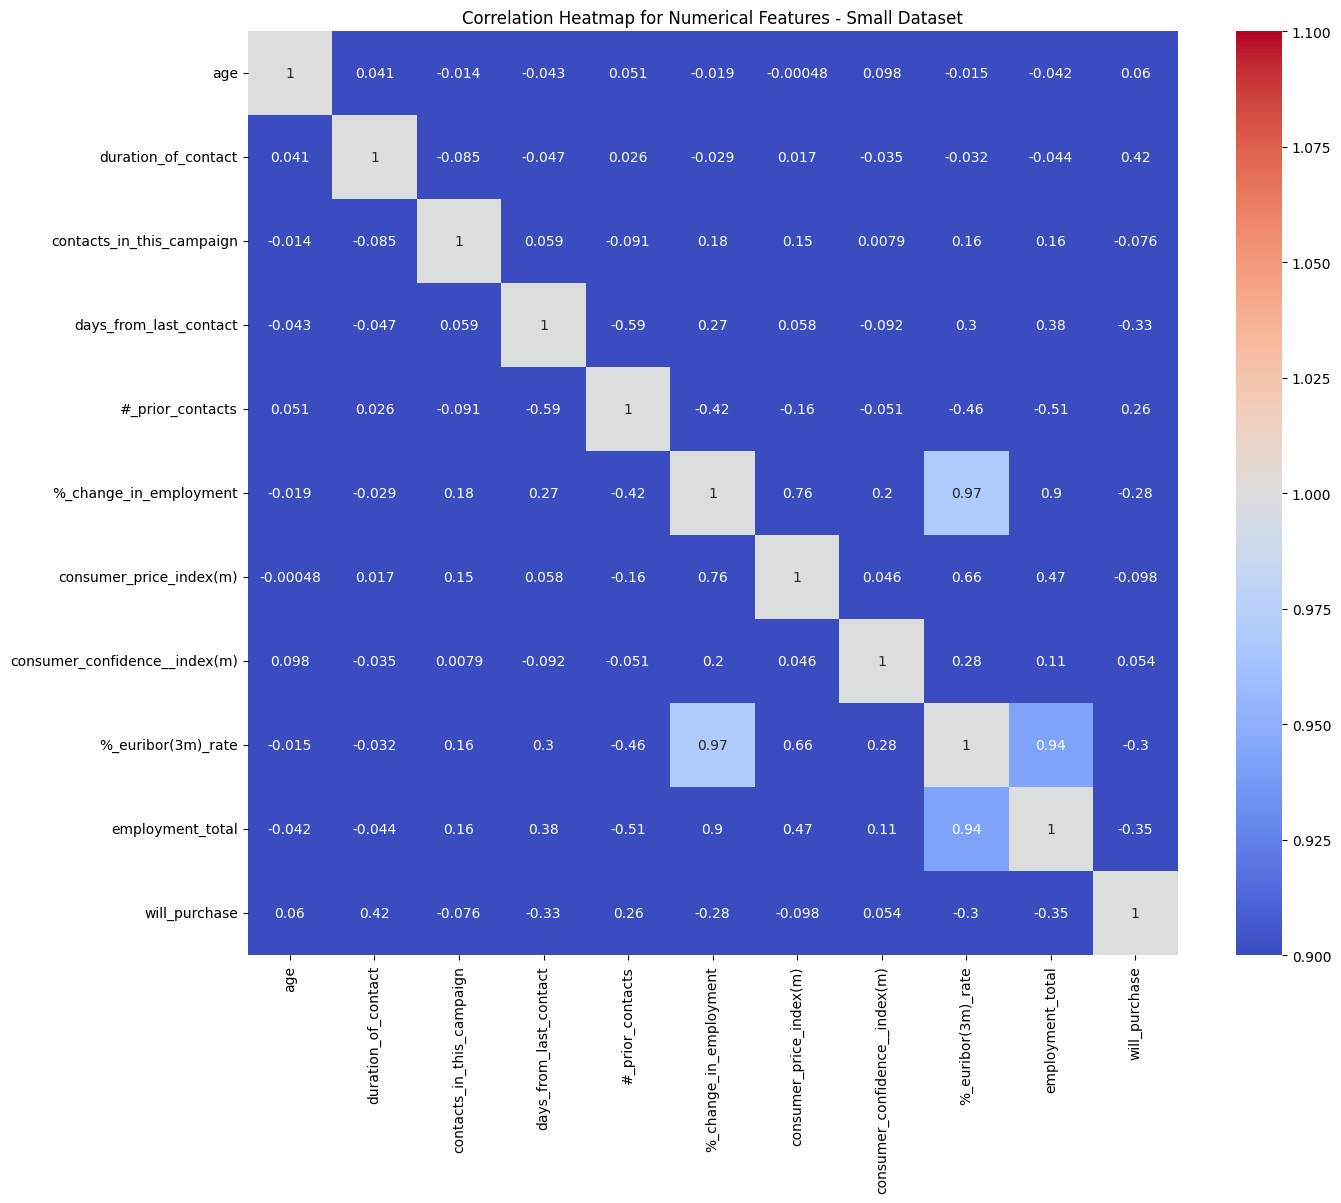

In [113]:
import matplotlib.pyplot as plt

import seaborn as sns

# Selecting numerical features only
df_numeric = df.select_dtypes(include=['float64','int64'])

pd.set_option('display.max_colwidth', None)

# Heatmap on numerical features
plt.figure(figsize=(15,12))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm',vmin=1,vmax=1)
plt.title('Correlation Heatmap for Numerical Features - Small Dataset')
plt.savefig('Correlation Heatmap for Numerical Features - Small Dataset.png')
files.download('Correlation Heatmap for Numerical Features - Small Dataset.png')
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

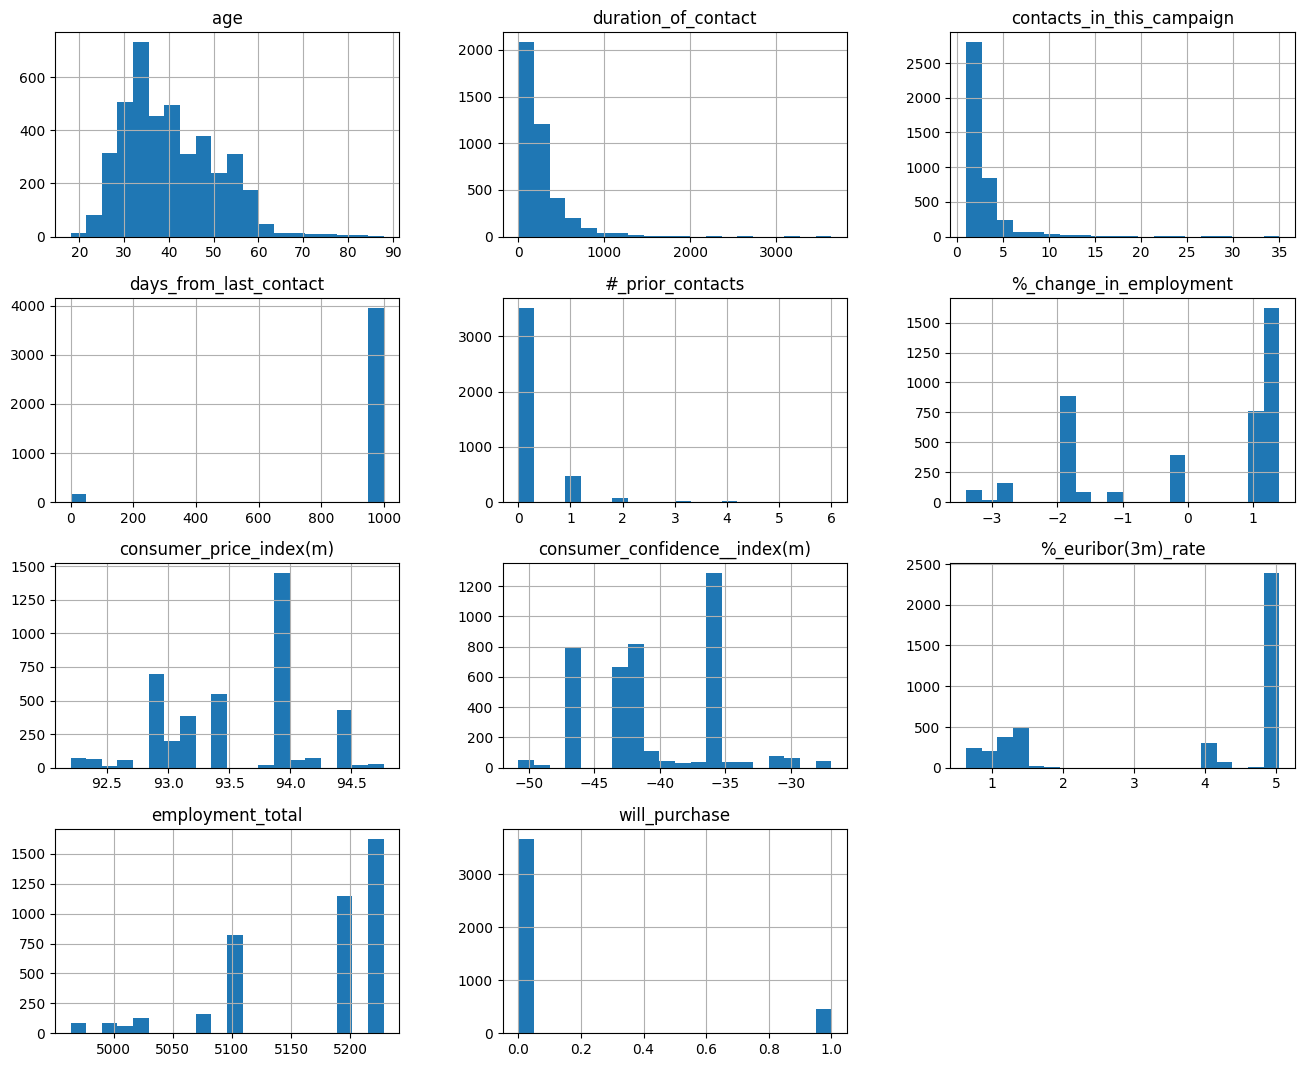

In [114]:
# Histogram for numerical varaibles
df_numeric.hist(bins=20, figsize=(16,13))
plt.title("Histogram of Numerical Features - small data set.png")
plt.savefig('Histogram of Numerical Features - small data set.png')
files.download('Histogram of Numerical Features - small data set.png')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

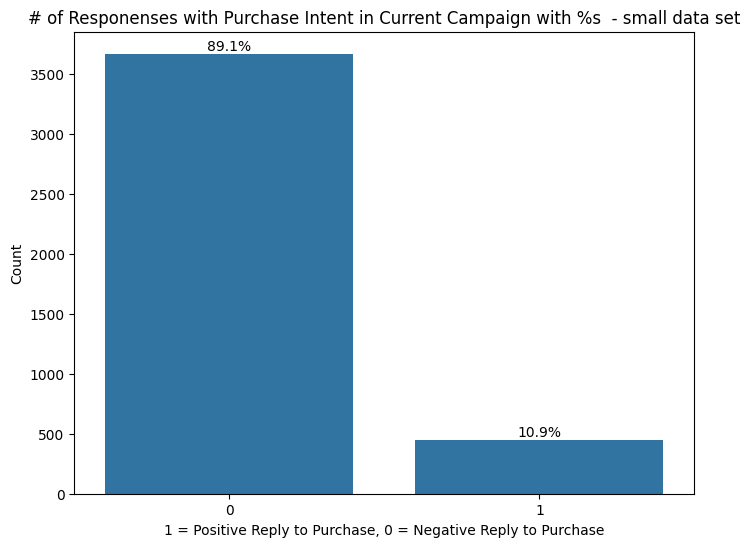

In [115]:
# Plot the Successful Contacts with percentages on top of each bar
plt.figure(figsize=(8,6))
ax=sns.countplot(x='will_purchase', data=df)

# Calculate percenteges and annotate teh bars
total = len(df)
for p in ax.patches:
  percentage = f'{100 * p.get_height() / total:.1f}%' #calculate the percentage
  x = p.get_x() + p.get_width()/2
  y = p.get_height() # Y position for the label
  ax.annotate(percentage, (x,y), ha ='center', va='bottom', fontsize = 10)

# Add title and labels
plt.title('# of Responenses with Purchase Intent in Current Campaign with %s  - small data set')
plt.xlabel('1 = Positive Reply to Purchase, 0 = Negative Reply to Purchase')
plt.ylabel('Count')
plt.savefig('# of Responenses with Purchase Intent in Current Campaign with %s - small data set.png')
files.download('# of Responenses with Purchase Intent in Current Campaign with %s - small data set.png')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

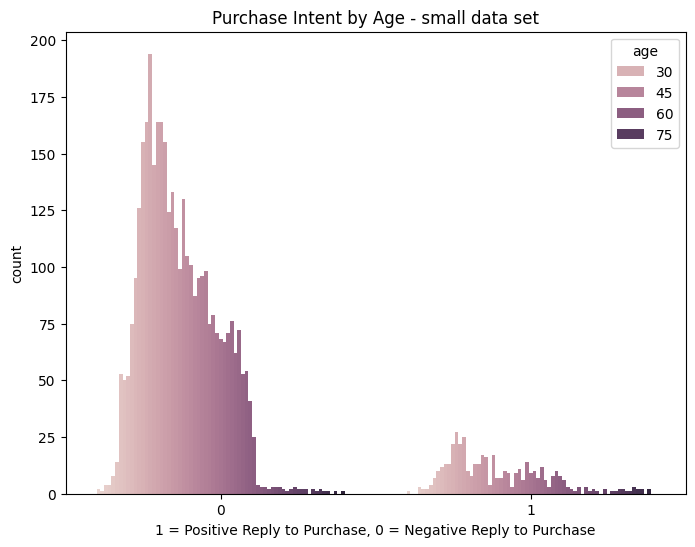

In [116]:
# Age vs Purchase Intent
plt.figure(figsize=(8,6))
sns.countplot(x='will_purchase', hue='age', data=df)
plt.title('Purchase Intent by Age - small data set')
plt.xlabel('1 = Positive Reply to Purchase, 0 = Negative Reply to Purchase')
plt.ylabel('count')
plt.savefig('Purchase Intent by Age - small data set.png')
files.download('Purchase Intent by Age - small data set.png')
plt.show()

In [117]:
df.columns

Index(['age', 'job_type', 'marital_status', 'highest_education',
       'has_credit_default', 'has_mortgage', 'has_personal_loan',
       'contact_type', 'month_of_contact', 'day_of_contact',
       'duration_of_contact', 'contacts_in_this_campaign',
       'days_from_last_contact', '#_prior_contacts', 'prior_outcome',
       '%_change_in_employment', 'consumer_price_index(m)',
       'consumer_confidence__index(m)', '%_euribor(3m)_rate',
       'employment_total', 'will_purchase'],
      dtype='object')

### Create Visualizations to show the Distributions for the Columns

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

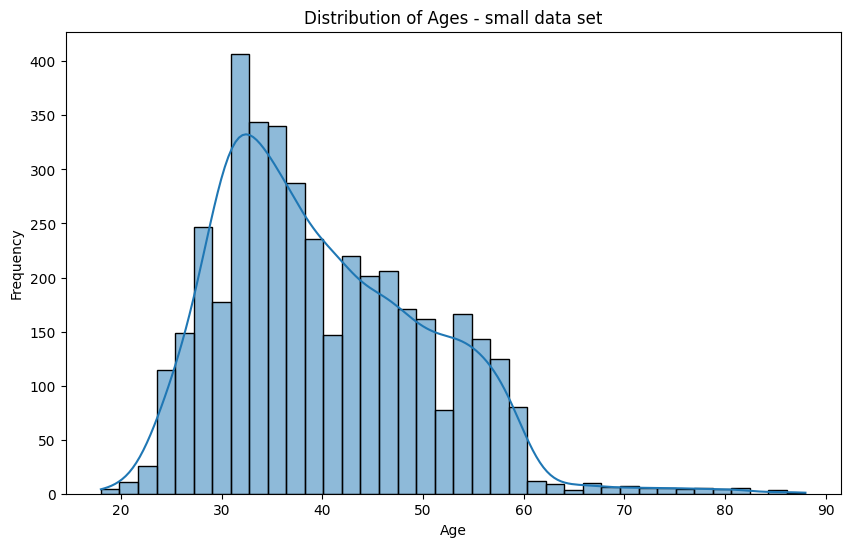

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

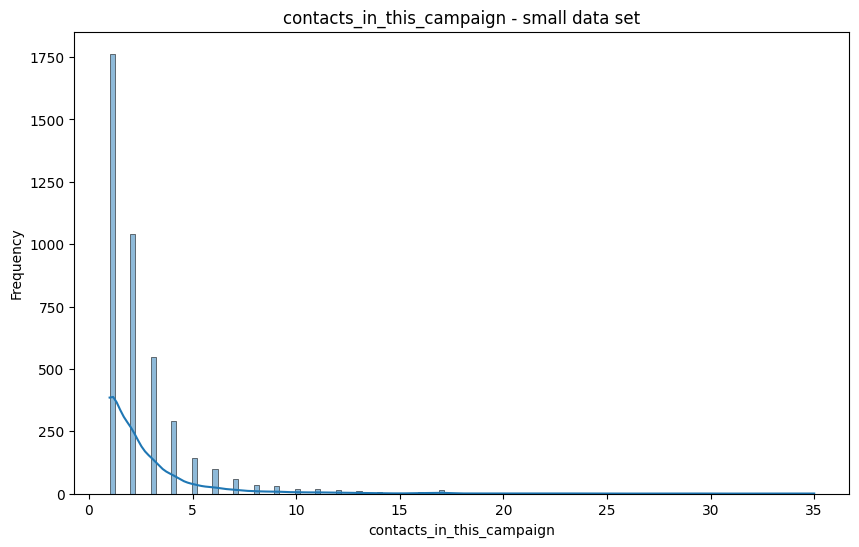

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

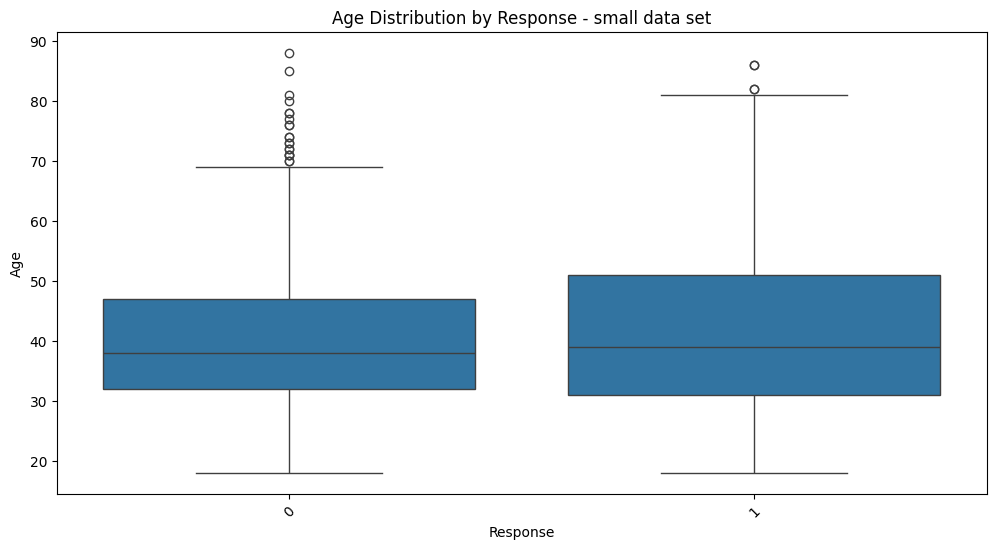

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

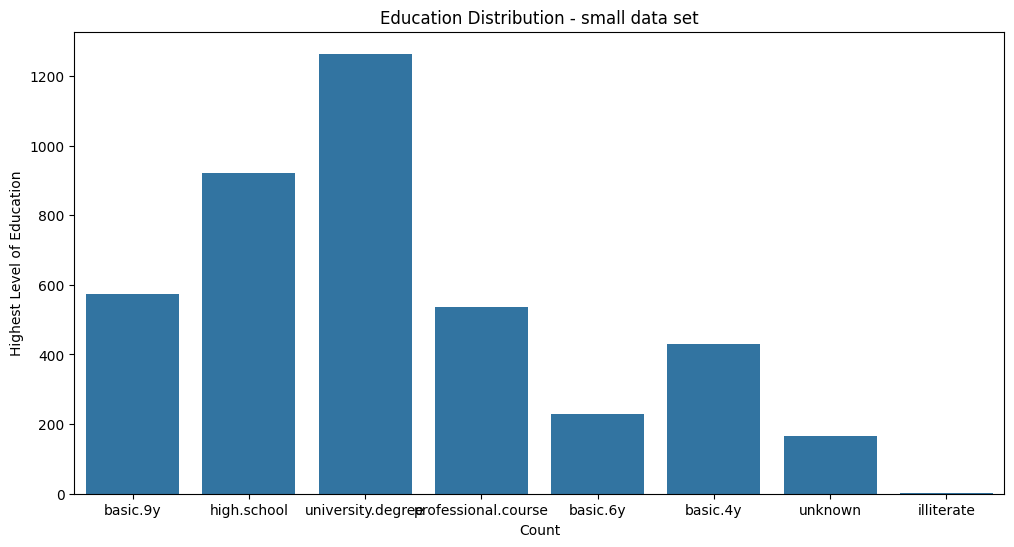

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

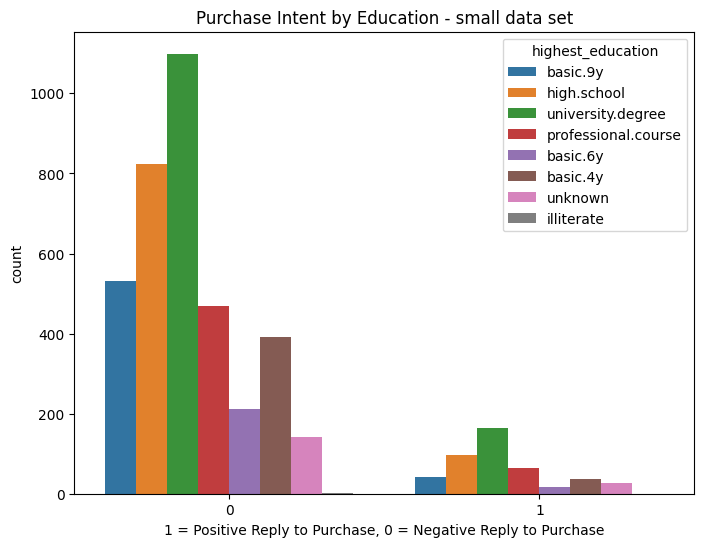

In [118]:

# 1. Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Ages - small data set')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('age_distribution - small data set.png')
files.download('age_distribution - small data set.png')

plt.show()

# 2. Distribution of Contacts in Current Campaign
plt.figure(figsize=(10, 6))
sns.histplot(df['contacts_in_this_campaign'], kde=True)
plt.title('contacts_in_this_campaign - small data set')
plt.xlabel('contacts_in_this_campaign')
plt.ylabel('Frequency')
plt.savefig('contacts_in_this_campaign_distribution - small data set.png')
files.download('contacts_in_this_campaign_distribution - small data set.png')

plt.show()

# 3. Boxplot of Responses by Age
plt.figure(figsize=(12, 6))
sns.boxplot(x='will_purchase', y='age', data=df)
plt.title('Age Distribution by Response - small data set')
plt.xlabel('Response')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.savefig('Response_by_age - small data set.png')
files.download('Response_by_age - small data set.png')
plt.show()


# 4.  Countplot of Education

plt.figure(figsize=(12, 6))
sns.countplot(x='highest_education', data=df)
plt.title('Education Distribution - small data set')
plt.xlabel('Count')
plt.ylabel('Highest Level of Education')
plt.savefig('Education Distribution - small data set.png')
files.download('Education Distribution - small data set.png')

plt.show()

# 6.  Relationship between Educaiton and Response (Scatterplot)

plt.figure(figsize=(8,6))
sns.countplot(x='will_purchase', hue='highest_education', data=df)
plt.title('Purchase Intent by Education - small data set')
plt.xlabel('1 = Positive Reply to Purchase, 0 = Negative Reply to Purchase')
plt.ylabel('count')
plt.savefig('Purchase Intent by Education - small data set.png')
files.download('Purchase Intent by Education - small data set.png')

plt.show()


## **NOTE:** Because there is a small percentage of y yes, versus no values, we will stratify y later

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

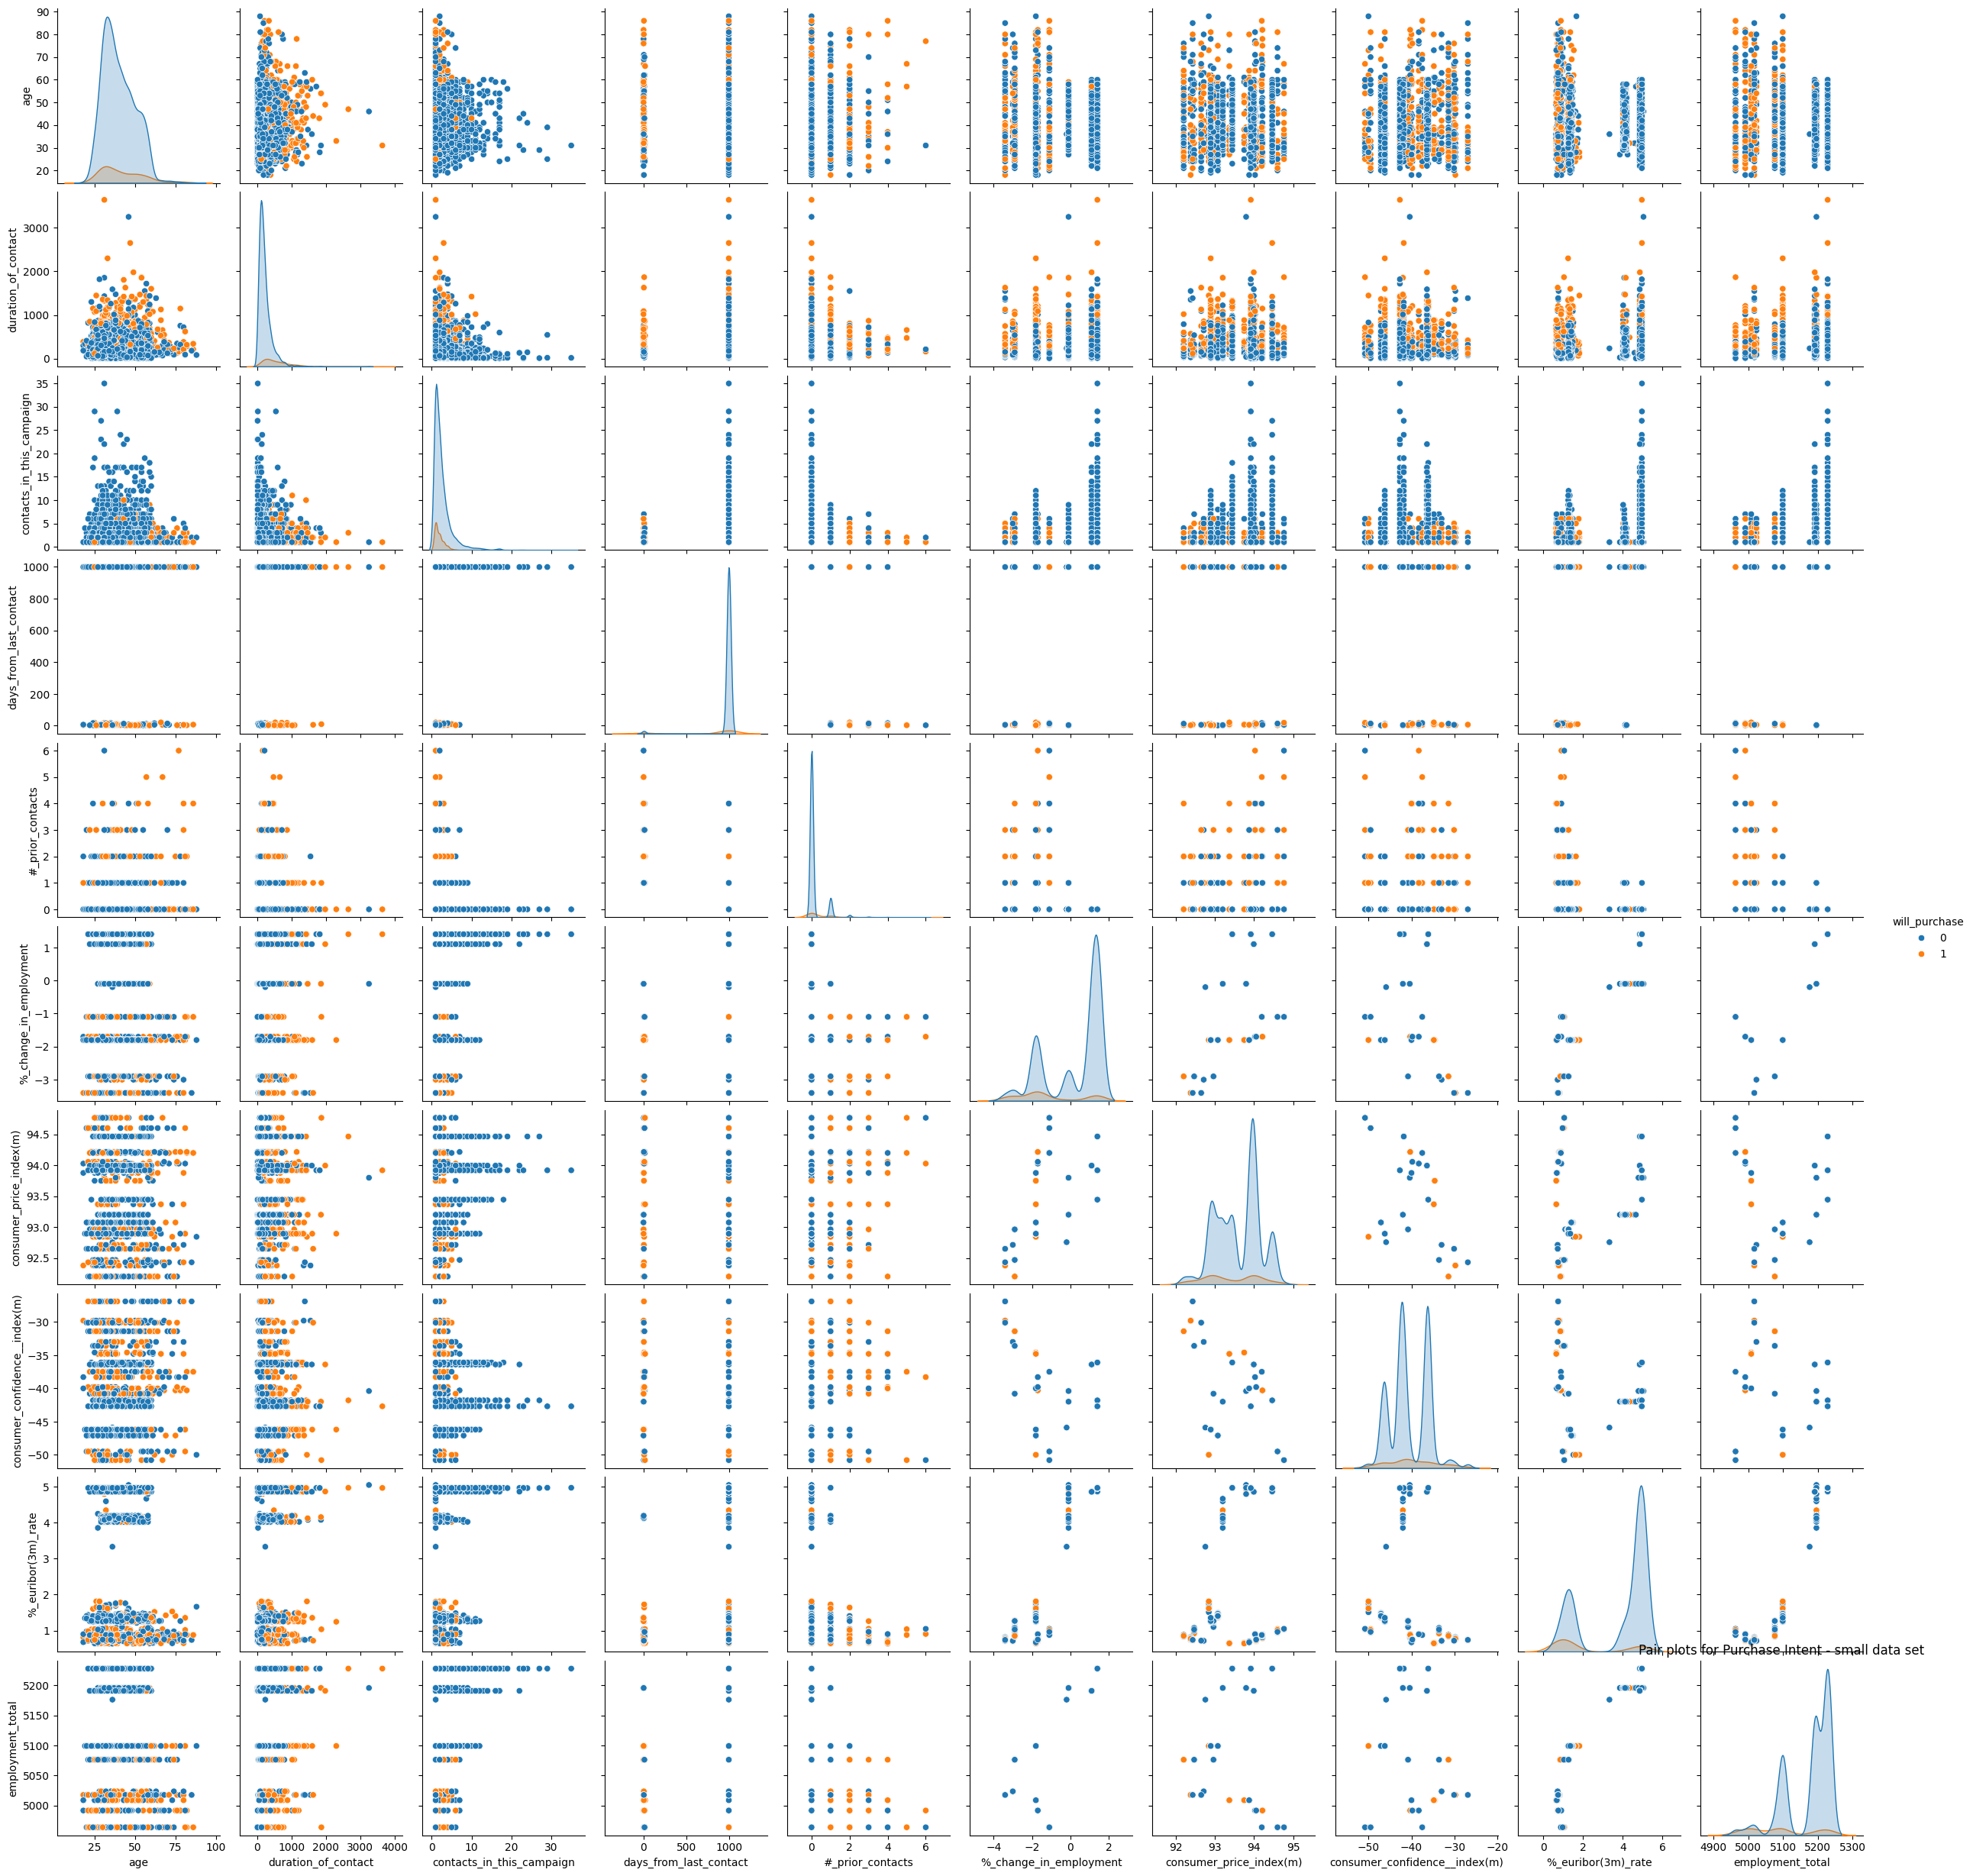

In [119]:
# Create a pairplot for all numerical variables, coloring by the "will_purchase" target variable.
sns.pairplot(df,hue='will_purchase')
plt.title('Pair plots for Purchase Intent - small data set')
plt.savefig('Pair plots for Purchase Intent - small data set.png')
files.download('Pair plots for Purchase Intent - small data set.png')

plt.show()

### 3.2 Identify and Resolve Null and 0 Values

In [120]:
# Find all the columns where there are null values
missing_counts = df.isnull().sum().sort_values()
print(missing_counts)

age                              0
job_type                         0
marital_status                   0
highest_education                0
has_credit_default               0
has_mortgage                     0
has_personal_loan                0
contact_type                     0
month_of_contact                 0
day_of_contact                   0
duration_of_contact              0
contacts_in_this_campaign        0
days_from_last_contact           0
#_prior_contacts                 0
prior_outcome                    0
%_change_in_employment           0
consumer_price_index(m)          0
consumer_confidence__index(m)    0
%_euribor(3m)_rate               0
employment_total                 0
will_purchase                    0
dtype: int64


### **NOTE:** There are no Null values

### 3.3 Remove duplicates, if any

In [121]:
# Identify how many rows of data there are before looking for missing data or duplicates
print("Before removing duplicates:", df.shape)
df_original = df.copy()

Before removing duplicates: (4119, 21)


In [122]:
df = df.drop_duplicates()


In [123]:
print("After removing duplicates:", df.shape)

After removing duplicates: (4119, 21)


In [124]:
print(f"The number of dropped rows is: {df_original.shape[0] - df.shape[0]} , only {df.shape[0]} rows remain")

The number of dropped rows is: 0 , only 4119 rows remain


### **NOTE:** A small number of duplicates were removed from the Full Data Set, but this smaller set has not duplicates removed.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

## 4.1 Determine business objectives:

### 4.1.0 Business Objectives and Background

The client is the sales and marketing leadership of a Portugese bank.  

This bank's marketing department has conducted multiple phone call based marketing campaigns contacting prospects one or more times in order to determine if the prospect would make a term deposit.

Based on the data collected, the client would like to understand what type of customer is most likely to subscribe to a term deposits, and, possibly, segment these customers into different populations (target markets) based on their characterstics (demographics).

The bank's marketing department can then use this information to determine how to best increase sales of their term deposit product

###  4.1.1 Business success criteria

The banks success is determined by the profit is is able to generate from its current and future client base by selling to the client its 'products'.  In this case, the produc is a term deposit, however, there are other products that could also be sold to the same prospect.  In the case of this specific product, term deposits, the success criteria is being able to identify which prospects, whether currently customers of the bank or not, are most likely to purchase the product.  Once this is known, the bank can then focus its limited resources on selling to these likely product customers, thus reducing sales expenses spent on customer who are not likely to buy the product AND prioritize sales actictivies on customer who are likley to by the product, thus maximizing revenue and profit for the product.

### 4.2.0 Inventory of resources

Data Resources:  The data resource available are two data sets, one one with all observations and on, a random subset of 10% of these total observations located at https://archive.ics.uci.edu/dataset/222/bank+marketing.

Technical Resources:  Anaconda, Jupyter notebooks, Google Colab, Python libraries.

Manpower Resources: One individual

### 4.2.1 Requirements, assumptions, constraints

**Requirements:**
*  Identify possible characteristics / demographics of prospects who will or who will not purchase the product (primary)
*  Further segment possible purchases into target markets (secondary)

**Assumptions**
* Determinations and recommendations will be made on complete data
* The scope of the analysis is restricted to the data provided
* Both current bank customers and non-customers are included in both data sets

**Constraints**
* As an exercise, it is not possible to verify business objectives or requirements
* The business objectives, requirements, assumptions and constraints can only be assumed
* While there are four data sets total avaible online, only two will be used for this analysis, and one of these sets is a randomized subset of the other
* Computation Restraints... the number of rows of data and features make it to computationaly intensive to use the full data set

## 4.3 Determine the data mining goals
### 4.3.0 Data Mining Goals

Primary Goal - Segment the prospects into two groups, group A - respondents who have indicated they will subscribe to (purchase) the product and group B - those who will not.
Secondary Goal - Characterize these two groups' features
Tertiary Goal - Segment group A into target markets

### 4.3.1 Data Mining Success Criteria

The respondents can be segmented into Group A and Group B.

## 4.4 Project Plan

### 4.4.0

The data set will be accesssed, understood, prepared, modeled and evaluated in order to meet the data mining success criteria, and, thusly, the business objectives

### 4.4.1 Project plan steps

1.   Import data
2.   Understand data
3.   Prepare Data
4.   Create Visualizations
5.   Modeling with KNN, Decision Trees, Log Regression, SVM
6.   Modeling - use K-fold or Hold-Out Cross-Validation, use Grid-search and identify best Model with best Hyperparameters
7. Evaluate the models using coefficients and error metrics.  
8.  Identify the influence of the factors on respondents who indicated they would purchase the product and those who will not
9. Define next steps and recommendations
10. Write Conclusions and post to Github

### Problem 5: Engineering Features

##**NOTE:** According to Vivian, "it is crurical to split the data into training and testing sets BEFORE performaing any feature engineering or training them model."

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

## 5.1 Identify Categorical Columns for Numerical Encoding

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            4119 non-null   int64  
 1   job_type                       4119 non-null   object 
 2   marital_status                 4119 non-null   object 
 3   highest_education              4119 non-null   object 
 4   has_credit_default             4119 non-null   object 
 5   has_mortgage                   4119 non-null   object 
 6   has_personal_loan              4119 non-null   object 
 7   contact_type                   4119 non-null   object 
 8   month_of_contact               4119 non-null   object 
 9   day_of_contact                 4119 non-null   object 
 10  duration_of_contact            4119 non-null   int64  
 11  contacts_in_this_campaign      4119 non-null   int64  
 12  days_from_last_contact         4119 non-null   i

#### Visualize Categorical columns observations with forced order


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

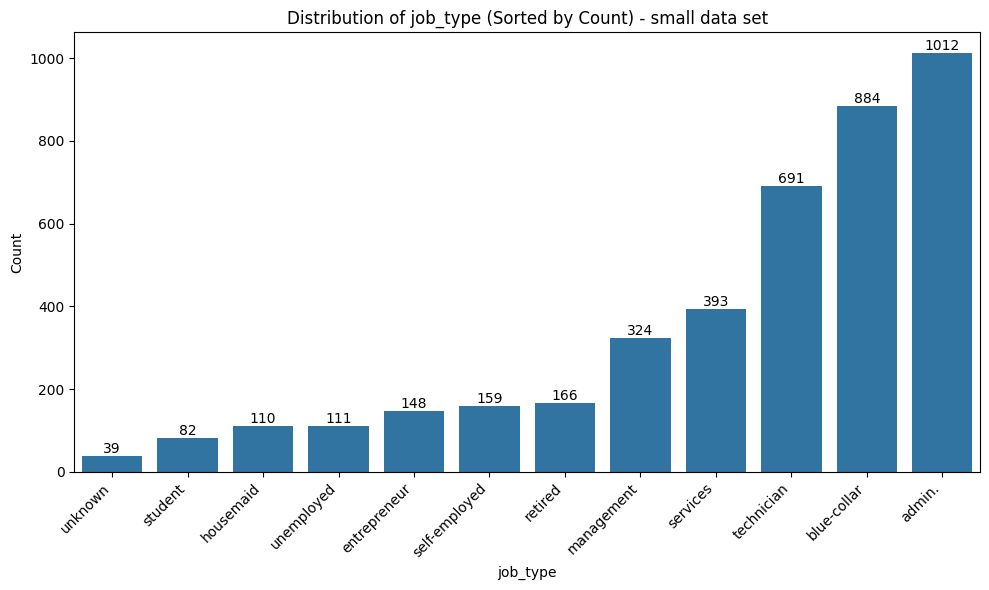

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

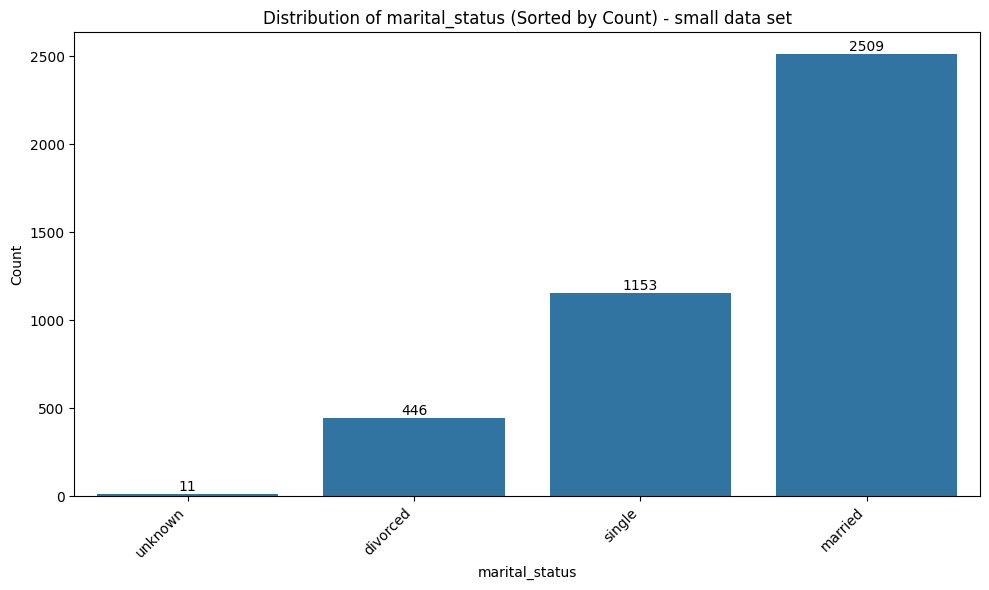

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

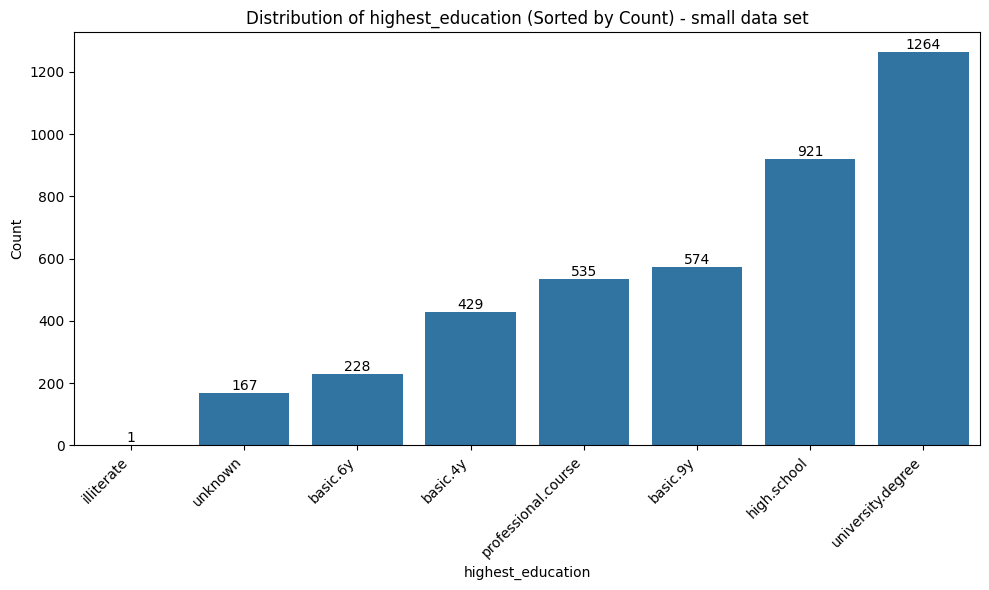

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

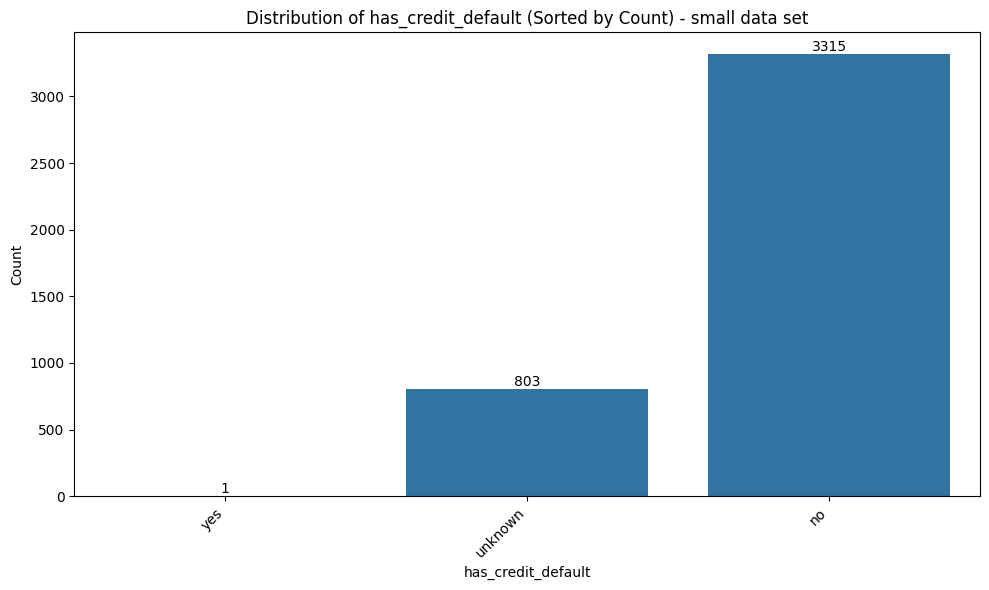

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

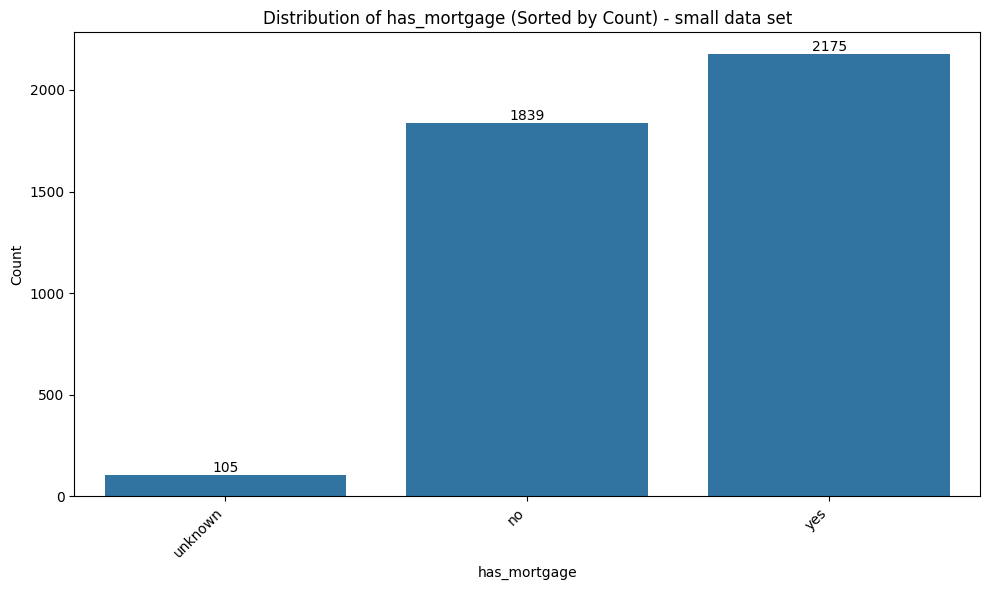

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

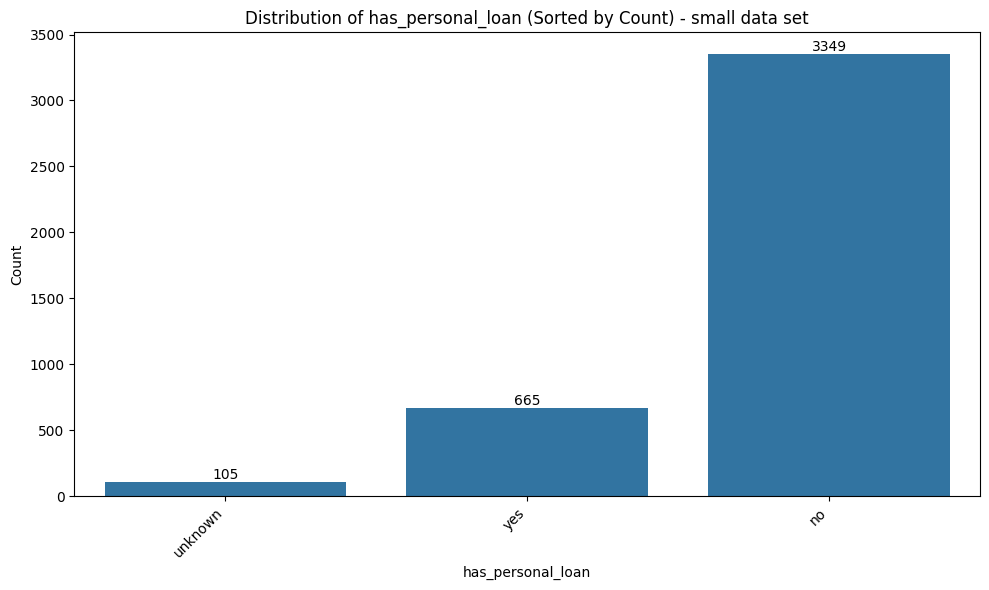

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

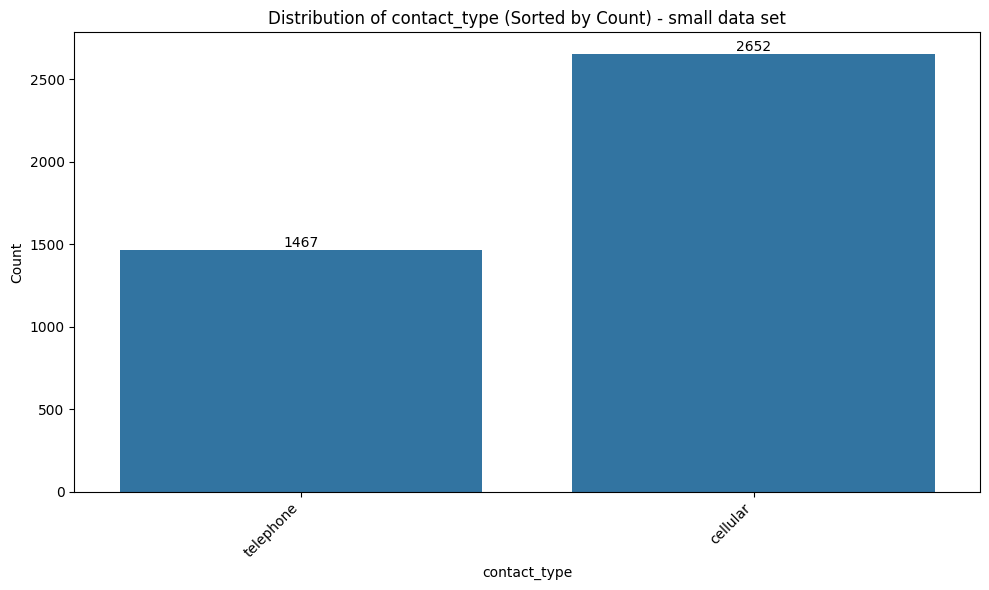

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

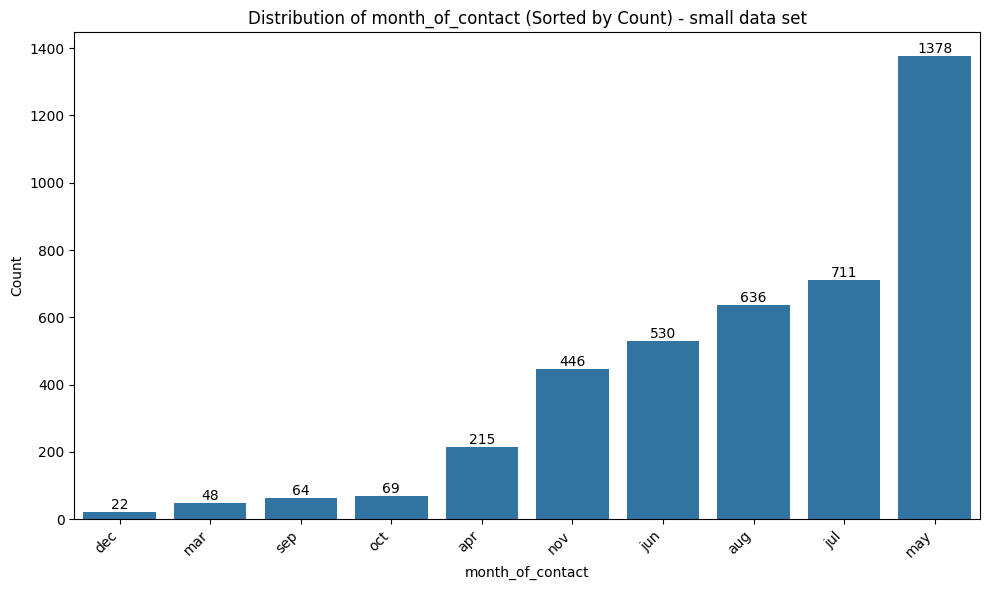

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

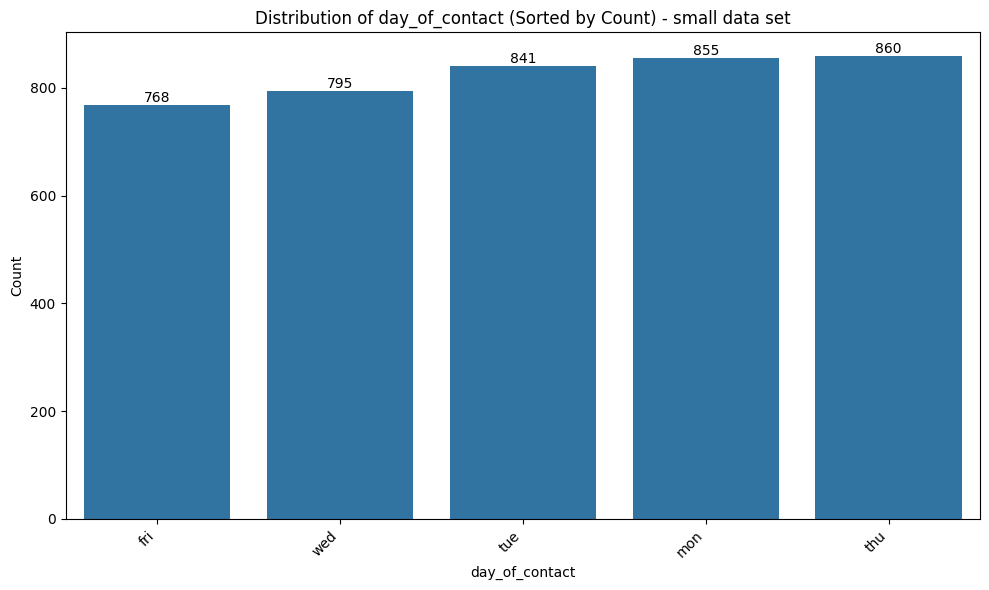

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

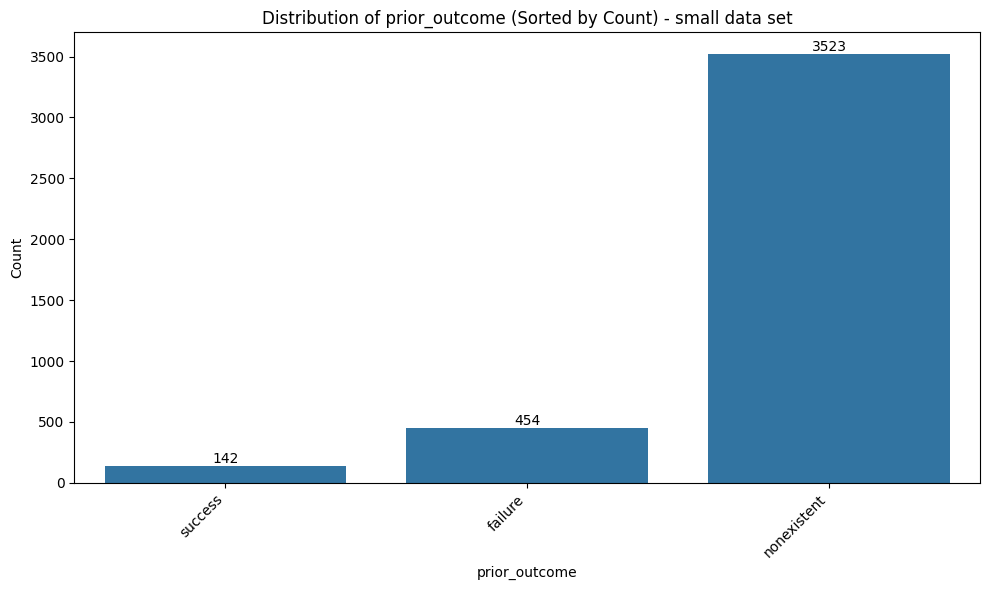

In [126]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols

def plot_categorical_distribution_seaborn_sorted(df, column_name):
    """
    Plots the distribution of a categorical column using Seaborn's countplot(),
    with bars sorted from least frequent to most frequent, and adds count labels
    on top of each bar.

    Args:
        df: The input DataFrame.
        column_name: The name of the categorical column to plot.
    """
    if column_name not in df.columns:
        print(f"Warning: Column '{column_name}' not found in DataFrame. Skipping.")
        return

    # Get the counts for each category and sort them
    category_counts = df[column_name].value_counts().sort_values()

    # Create the bar chart with sorted order
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    bars = sns.countplot(x=column_name, data=df, order=category_counts.index)  # Store the plot in 'bars'
    plt.title(f'Distribution of {column_name} (Sorted by Count) - small data set')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

    # Add count labels on top of each bar
    for bar in bars.containers:
        bars.bar_label(bar)

    plt.tight_layout()
    plt.savefig(f'{column_name}_distribution_sorted - small data set.png')  # Optional: Save the figure
    files.download(f'{column_name}_distribution_sorted - small data set.png')

    plt.show()

# Example usage:
# Loop over some categorical columns to plot them
for column in categorical_cols:
    plot_categorical_distribution_seaborn_sorted(df, column)

### Check on unique values

In [127]:
# Identify the unique values for the data

for col in df.columns:
    print(f"Unique values in column '{col}':")
    print(df[col].unique())
    print("-" * 30)  # Separator for better readability



Unique values in column 'age':
[30 39 25 38 47 32 41 31 35 36 29 27 44 46 45 50 55 40 28 34 33 51 48 20
 76 56 24 58 60 37 52 42 49 54 59 57 43 53 75 82 71 21 22 23 26 81 61 67
 73 18 64 74 77 86 85 63 88 78 72 68 80 66 19 62 65 69 70]
------------------------------
Unique values in column 'job_type':
['blue-collar' 'services' 'admin.' 'entrepreneur' 'self-employed'
 'technician' 'management' 'student' 'retired' 'housemaid' 'unemployed'
 'unknown']
------------------------------
Unique values in column 'marital_status':
['married' 'single' 'divorced' 'unknown']
------------------------------
Unique values in column 'highest_education':
['basic.9y' 'high.school' 'university.degree' 'professional.course'
 'basic.6y' 'basic.4y' 'unknown' 'illiterate']
------------------------------
Unique values in column 'has_credit_default':
['no' 'unknown' 'yes']
------------------------------
Unique values in column 'has_mortgage':
['yes' 'no' 'unknown']
------------------------------
Unique values in

## **NOTE: DATA CLEANSING** I will delete all records where the value is "unknown", this will reduce the number of columns required for encoding.

**Additionaly, "unknown" is an artifact of data collection, or survey bias, or could be data entry error, response bias, etc., so it will not be included in the baseline.**

 Variables with unknowns are:

*   job_type
*   marital_status
*   highest_education
*   has_credit_default
*   has_mortgage
*   has_personal_loan



In [128]:
df.shape

(4119, 21)

### Delete Non-needed Features

In [129]:
df['has_credit_default'].value_counts()


has_credit_default
no         3315
unknown     803
yes           1
Name: count, dtype: int64

In [130]:
df['highest_education'].value_counts()


highest_education
university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: count, dtype: int64

In [131]:
# Drop outliser for _has_credit_default
# Drop outlier for highest_educaiton is illiterate
df.drop(['has_credit_default'], axis=1, inplace=True)
df = df[df['highest_education'] != 'illiterate']




In [132]:
df_with_unknowns =df.copy()
for column in df.columns:
    df = df[df[column] != 'unknown']

# Display the modified DataFrame


In [133]:
print(f"The number of dropped rows is: {df_with_unknowns.shape[0] - df.shape[0]} , only {df.shape[0]} rows remain")

The number of dropped rows is: 308 , only 3810 rows remain


[link text](https://)### **NOTE:** 1029 rows were dropped do to the value of "unknown" in observations

In [134]:
for column in df.columns:
    print(f"Value counts for column '{column}':")
    print(df[column].value_counts())
    print("-" * 30)  # Separator for better readability

Value counts for column 'age':
age
32    206
31    181
34    167
30    166
33    161
     ... 
64      1
85      1
77      1
88      1
19      1
Name: count, Length: 65, dtype: int64
------------------------------
Value counts for column 'job_type':
job_type
admin.           970
blue-collar      814
technician       653
services         361
management       306
retired          153
self-employed    147
entrepreneur     139
housemaid        104
unemployed       101
student           62
Name: count, dtype: int64
------------------------------
Value counts for column 'marital_status':
marital_status
married     2330
single      1063
divorced     417
Name: count, dtype: int64
------------------------------
Value counts for column 'highest_education':
highest_education
university.degree      1239
high.school             885
basic.9y                544
professional.course     517
basic.4y                405
basic.6y                220
Name: count, dtype: int64
------------------------------


In [135]:
# Drop month_of_contact due to skew in distributio
df.drop(['month_of_contact'], axis=1, inplace=True)


In [137]:
for column in df.columns:
    print(f"Value counts for column '{column}':")
    print(df[column].value_counts())
    print("-" * 30)  # Separator for better readability

Value counts for column 'age':
age
32    206
31    181
34    167
30    166
33    161
     ... 
64      1
85      1
77      1
88      1
19      1
Name: count, Length: 65, dtype: int64
------------------------------
Value counts for column 'job_type':
job_type
admin.           970
blue-collar      814
technician       653
services         361
management       306
retired          153
self-employed    147
entrepreneur     139
housemaid        104
unemployed       101
student           62
Name: count, dtype: int64
------------------------------
Value counts for column 'marital_status':
marital_status
married     2330
single      1063
divorced     417
Name: count, dtype: int64
------------------------------
Value counts for column 'highest_education':
highest_education
university.degree      1239
high.school             885
basic.9y                544
professional.course     517
basic.4y                405
basic.6y                220
Name: count, dtype: int64
------------------------------


In [138]:
# There are still sufficent observations in the target variable
df['will_purchase'].value_counts()

will_purchase
0    3397
1     413
Name: count, dtype: int64

## **NOTE** For encoding, the following columns will use a One-hot encoder:


*   job_type
*   marital_status
*   highest_education
*   has_credit_default
*   has_mortgage
*   has_personal_loan
*   prior_outcome



## **NOTE:** For encoding, the following columns will use Numerical Encoder:

*   month_of_contact
*   day_of_contact


## **NOTE:** For will_purchase, will change this to 0 for No, 1 for Yes




#Before feature engineering, we ahve to perform the Training and Testing Split

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

### **NOTE:** For the baseline model, we will include duration = 0, but we will exclude this for all other later models

In [139]:
## Create X, y for the baseline model
X_baseline = df.drop(columns='will_purchase')
y_baseline = df.will_purchase

In [140]:
## Train Test split for baseline
from sklearn.model_selection import train_test_split
X_train_baseline,X_test_baseline,y_train_baseline,y_test_baseline = train_test_split(X_baseline,y_baseline, test_size=.25,random_state=42)

In [141]:
## Create X, y for all other rows, Deleting where duration is 0

df = df[df['duration_of_contact'] != 0]

# Reset the index if needed
df = df.reset_index(drop=True)
X = df.drop(columns='will_purchase')
y = df.will_purchase

In [142]:
# Count the number of rows where duration_of_contact is 0
count_zero_duration = (df['duration_of_contact'] == 0).sum()

# Print the count
print(f"Number of rows with duration_of_contact == 0: {count_zero_duration}")

Number of rows with duration_of_contact == 0: 0


In [143]:
## Train Test split, stratify given less number of y = yes answers
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.25,random_state=42, stratify=y)

In [144]:
X_train.head()

age     job_type marital_status  highest_education has_mortgage  \
3358   56   management        married  university.degree          yes   
1645   33     services        married        high.school           no   
1793   36    housemaid       divorced           basic.4y          yes   
2379   38  blue-collar        married           basic.6y          yes   
3111   29       admin.         single  university.degree           no   

     has_personal_loan contact_type day_of_contact  duration_of_contact  \
3358                no     cellular            tue                   90   
1645                no    telephone            tue                  131   
1793                no     cellular            tue                  163   
2379                no    telephone            tue                  258   
3111                no     cellular            mon                   87   

      contacts_in_this_campaign  days_from_last_contact  #_prior_contacts  \
3358                          1                     999                 0   
1645                          1                     999                 0   
1793                          2                     999                 1   
2379                          1                     999                 0   
3111                          2                     999                 1   

     prior_outcome  %_change_in_employment  consumer_price_index(m)  \
3358   nonexistent                     1.4                   93.918   
1645   nonexistent                     1.1                   93.994   
1793       failure                    -0.1                   93.200   
2379   nonexistent                     1.4                   94.465   
3111       failure                    -3.4                   92.431   

      consumer_confidence__index(m)  %_euribor(3m)_rate  employment_total  
3358                          -42.7               4.961            5228.1  
1645                          -36.4               4.856            5191.0  
1793                          -42.0               4.153            5195.8  
2379                          -41.8               4.864            5228.1  
3111                          -26.9               0.731            5017.5

In [146]:
y_train.value_counts()

will_purchase
0    2546
1     310
Name: count, dtype: int64

In [147]:
# Check the size of the sets
print(f"X Training set size: {X_train.shape}. Training labels size: {y_train.shape}")
print(f"X Test set size: {X_test.shape}. Test labels size: {y_test.shape}")

X Training set size: (2856, 18). Training labels size: (2856,)
X Test set size: (953, 18). Test labels size: (953,)


In [44]:
# imports
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

In [148]:
X_train.columns

Index(['age', 'job_type', 'marital_status', 'highest_education',
       'has_mortgage', 'has_personal_loan', 'contact_type', 'day_of_contact',
       'duration_of_contact', 'contacts_in_this_campaign',
       'days_from_last_contact', '#_prior_contacts', 'prior_outcome',
       '%_change_in_employment', 'consumer_price_index(m)',
       'consumer_confidence__index(m)', '%_euribor(3m)_rate',
       'employment_total'],
      dtype='object')

In [149]:
# Define which colums are circular, categorical and which are numerical
categorical_cols = ['job_type','marital_status',
                    'highest_education',
                    'has_mortgage',
                    'has_personal_loan','contact_type',
                  'day_of_contact','prior_outcome']
numerical_cols = ['age',
                  'duration_of_contact',
                  'contacts_in_this_campaign',
                  'days_from_last_contact',
                  '#_prior_contacts',
                  '%_change_in_employment',
                  'consumer_price_index(m)',
                  'consumer_confidence__index(m)',
                  '%_euribor(3m)_rate',
                  'employment_total']

print("Numerical Columns", len(numerical_cols))
print("Categorical Columns:", len(categorical_cols))
print("Columns in X_train:", len(X_train.columns))
all_cols = categorical_cols + numerical_cols
print("Columns in all_cols:", len(all_cols))

Numerical Columns 10
Categorical Columns: 8
Columns in X_train: 18
Columns in all_cols: 18


In [150]:
# Create a preprocessor that applies both imputation and scaling to numerical columns and one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num',Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')), # Imputation using the mean
            ('scaler',StandardScaler()) # Standardization of numerical columns
        ]), numerical_cols), # Pipeline for numerical columns
        ('cat',OneHotEncoder(drop='if_binary'), categorical_cols)
    ])

* We fit_transform ONLY X_train to learn the parameters of the transformation
* We use only transform on X_test to apply those same transformations, without recalculating the parameters

In [152]:
# Process X_train and X_test
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [153]:
# Check the size of the sets
print(f"X_train_processed set size: {X_train_processed.shape}. y_train labels size: {y_train.shape}")
print(f"X_test_processed set size: {X_test_processed.shape}. y_test labels size: {y_test.shape}")

X_train_processed set size: (2856, 41). y_train labels size: (2856,)
X_test_processed set size: (953, 41). y_test labels size: (953,)


In [154]:
#The name of the numerical columns remain unchange after the transformation
numerical_column_names = numerical_cols

# The method to get_feature_names_out generates the names of the new columns created by OneHotEncoder for categorical columns
categorical_column_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

#Combine the names of numerical and categorical columns into a single list
all_column_names = list(numerical_column_names) + list(categorical_column_names)




In [155]:
# Convert the matrix into a DataFrame with the column names
X_train_processed_df = pd.DataFrame(X_train_processed, columns=all_column_names)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=all_column_names)



In [156]:
print(f"X_train_processed_df set size: {X_train_processed.shape}. y_train labels size: {y_train.shape}")
print(f"X_test_processed_df set size: {X_test_processed.shape}. y_test labels size: {y_test.shape}")

X_train_processed_df set size: (2856, 41). y_train labels size: (2856,)
X_test_processed_df set size: (953, 41). y_test labels size: (953,)


## Balance the data

In [157]:
from imblearn.over_sampling import SMOTE # pip install imbalanced-learn
from collections import Counter

In [158]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the dataset

X_train_balanced, y_train_balanced = smote.fit_resample(X_train_processed_df, y_train)

In [159]:
# Print the class distribution after balancing
print("Class distribution after SMOTE:", Counter(y_train_balanced))
print(f"X_train_balanced set size: {X_train_balanced.shape}. y_train_balanced labels size: {y_train_balanced.shape}")
print(f"X_test_processed set size: {X_test_processed.shape}. y_test labels size: {y_test.shape}")

Class distribution after SMOTE: Counter({0: 2546, 1: 2546})
X_train_balanced set size: (5092, 41). y_train_balanced labels size: (5092,)
X_test_processed set size: (953, 41). y_test labels size: (953,)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

### CREATE a Dummy Classifer Model

### 7.1 Create Baseline Model

In [160]:
from sklearn.dummy import DummyClassifier

In [161]:
dummy_clf = DummyClassifier().fit(X_train_baseline, y_train_baseline)
baseline_score = dummy_clf.score(X_test_baseline, y_test_baseline)

print(baseline_score)

0.8866736621196223


### While for the entire The classifier should aim to beat the baseline score of 0.87335 for the Full Data Set.
### **NOTE:** For the smaller data set, the baseline score is 0.88667

In [162]:
(y_test_baseline==0).sum()/len(X_test_baseline)



np.float64(0.8866736621196223)

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

## **NOTE:** For all models from here on out, we will include duration = 0 for prediction purposes

In [163]:
from sklearn.linear_model import LogisticRegression

### 8.1 Build Log Regression Model

In [164]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42).fit(X_train_balanced,y_train_balanced)
y_pred = lr.predict(X_test_processed)





/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Problem 9: Score the Model

What is the accuracy of your model?

In [165]:
from sklearn import metrics


In [166]:
# Check the size of the sets
print(f"X Training set size: {X_train_balanced.shape}. Y Training labels size: {y_train_balanced.shape}")
print(f"X Test set size: {X_test_processed.shape}. Y Test labels size: {y_test.shape}")
print(f"Y Preds set size:{y_pred.shape}")

X Training set size: (5092, 41). Y Training labels size: (5092,)
X Test set size: (953, 41). Y Test labels size: (953,)
Y Preds set size:(953,)


In [167]:
X_test_processed.shape

(953, 41)

In [168]:
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
f1 = metrics.f1_score(y_test,y_pred)
print("Simple Log Regression accuracy:", accuracy)
print("Simple Log Regression precision:", precision)
print("Simple Log Regression recall:", recall)
print("Simple Log Regression F1 score:",f1)

Simple Log Regression accuracy: 0.8562434417628542
Simple Log Regression precision: 0.4166666666666667
Simple Log Regression recall: 0.8252427184466019
Simple Log Regression F1 score: 0.5537459283387622


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

## 10.0 Modeling  - First Pass

In [169]:
## Import models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Define model and train / evaluate

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree':DecisionTreeClassifier(random_state=42),
    'SVM':SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)

}

In [170]:
# Create a dictionary to store metrics
results ={}

# Train each model with cross-validation
for model_name, model in models.items():
  print(f"Training and evaluating {model_name} with cross-validation")

  # Perform corss-validation on the training set
  cv_scores = cross_val_score(
      model,
      X_train_balanced,
      y_train_balanced,
      scoring='accuracy',
      cv=5, # 5-fold cross validation
      n_jobs=-1 # use all available resources for faster computation
  )
  # Train the model on teh full training set
  model.fit(X_train_balanced, y_train_balanced)

  # Store the results in the dictionary
  results[model_name] = {
      'Cross-Validation Accuracy (mean)': cv_scores.mean(),
      'Cross-Valodation Accuracy (std)': cv_scores.std(),
  }



Training and evaluating Logistic Regression with cross-validation
Training and evaluating KNN with cross-validation
Training and evaluating Decision Tree with cross-validation
Training and evaluating SVM with cross-validation
Training and evaluating Random Forest with cross-validation


In [171]:
results_df=pd.DataFrame(results).T.sort_values('Cross-Validation Accuracy (mean)', ascending=False)
results_df

Cross-Validation Accuracy (mean)  \
Random Forest                                0.956412   
Decision Tree                                0.920279   
KNN                                          0.919679   
SVM                                          0.918108   
Logistic Regression                          0.892576   

                     Cross-Valodation Accuracy (std)  
Random Forest                               0.035645  
Decision Tree                               0.044992  
KNN                                         0.004117  
SVM                                         0.011303  
Logistic Regression                         0.010583

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

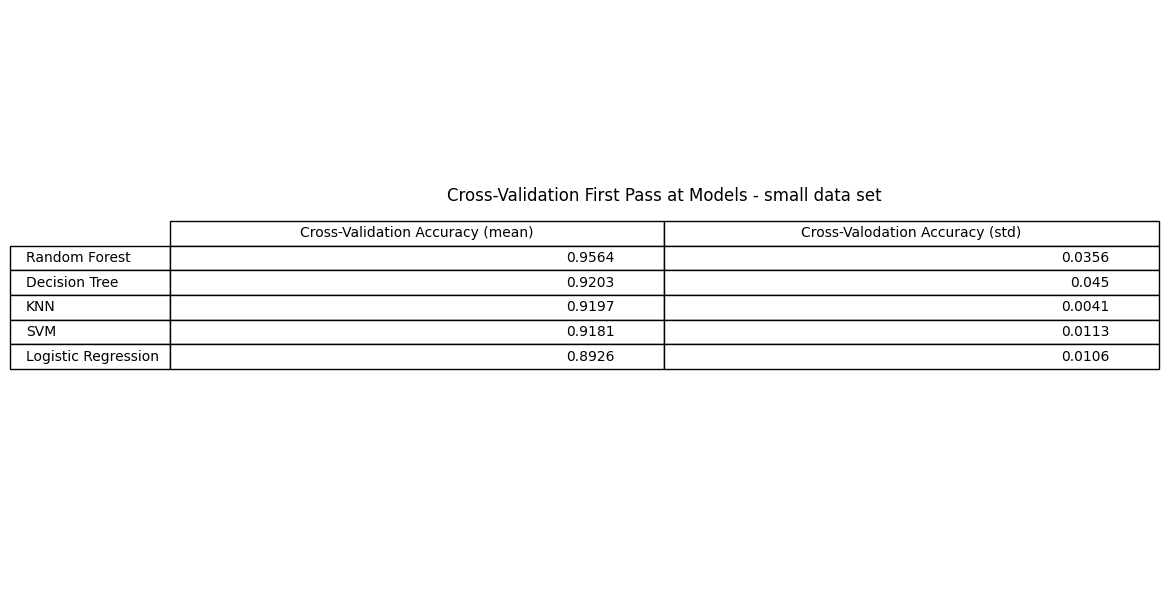

In [172]:
# Create plot for first pass
import pandas as pd
import matplotlib.pyplot as plt
# Round up the scores to 2 decimal places
for column in ['Cross-Validation Accuracy (mean)', 'Cross-Valodation Accuracy (std)']:
    results_df[column] = results_df[column].apply(lambda x: round(x, 4)) # Use apply() and round()

# Create image tio show results
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('off')

table = ax.table(cellText=results_df.values, rowLabels=results_df.index,colLabels=results_df.columns, loc='center')


table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.title("Cross-Validation First Pass at Models - small data set", y=.65)
plt.tight_layout()
plt.savefig('Cross-Validation First Pass at Models - small data set.png', bbox_inches='tight', dpi=300)
files.download('Cross-Validation First Pass at Models - small data set.png')
plt.show()

## 10.2 Model Evaluation

### 5-fold Cross Validation

In [173]:
from sklearn.model_selection import cross_validate  # Import cross_validate

# Reset the results dictionary
results = {
    "Model": [],
    'Accuracy': [],
    "Precision": [],
    "Recall": [],
    "F1 Score": [],
    "Training Time": [],
    "Inferencing Time": []
}


# Run models and save to results using cross-validation
import time
from sklearn import metrics

for model_name, model in models.items():
    # Perform cross-validation
    cv_results = cross_validate(model, X_train_balanced, y_train_balanced, scoring=['accuracy', 'precision', 'recall', 'f1'], cv=5, n_jobs=-1)

    # Store the average results
    results['Model'].append(model_name)
    results['Accuracy'].append(cv_results['test_accuracy'].mean())
    results['Precision'].append(cv_results['test_precision'].mean())
    results['Recall'].append(cv_results['test_recall'].mean())
    results['F1 Score'].append(cv_results['test_f1'].mean())
    results['Training Time'].append(cv_results['fit_time'].mean())  # Average training time
    results['Inferencing Time'].append(cv_results['score_time'].mean())  # Average inference time



In [174]:
# Create DataFrame after ensuring list lengths are consistent
results_df=''
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score  \
0  Logistic Regression  0.892576   0.873494  0.918295  0.895272   
1                  KNN  0.919679   0.863348  0.997252  0.925470   
2        Decision Tree  0.920279   0.913411  0.928101  0.918285   
3                  SVM  0.918108   0.882230  0.965037  0.921749   
4        Random Forest  0.956412   0.954255  0.959136  0.954791   

   Training Time  Inferencing Time  
0       0.049010          0.017092  
1       0.019186          0.214795  
2       0.193632          0.031138  
3       1.209659          0.340427  
4       2.369707          0.109295  


In [175]:
results_df

Model  Accuracy  Precision    Recall  F1 Score  \
0  Logistic Regression  0.892576   0.873494  0.918295  0.895272   
1                  KNN  0.919679   0.863348  0.997252  0.925470   
2        Decision Tree  0.920279   0.913411  0.928101  0.918285   
3                  SVM  0.918108   0.882230  0.965037  0.921749   
4        Random Forest  0.956412   0.954255  0.959136  0.954791   

   Training Time  Inferencing Time  
0       0.049010          0.017092  
1       0.019186          0.214795  
2       0.193632          0.031138  
3       1.209659          0.340427  
4       2.369707          0.109295

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

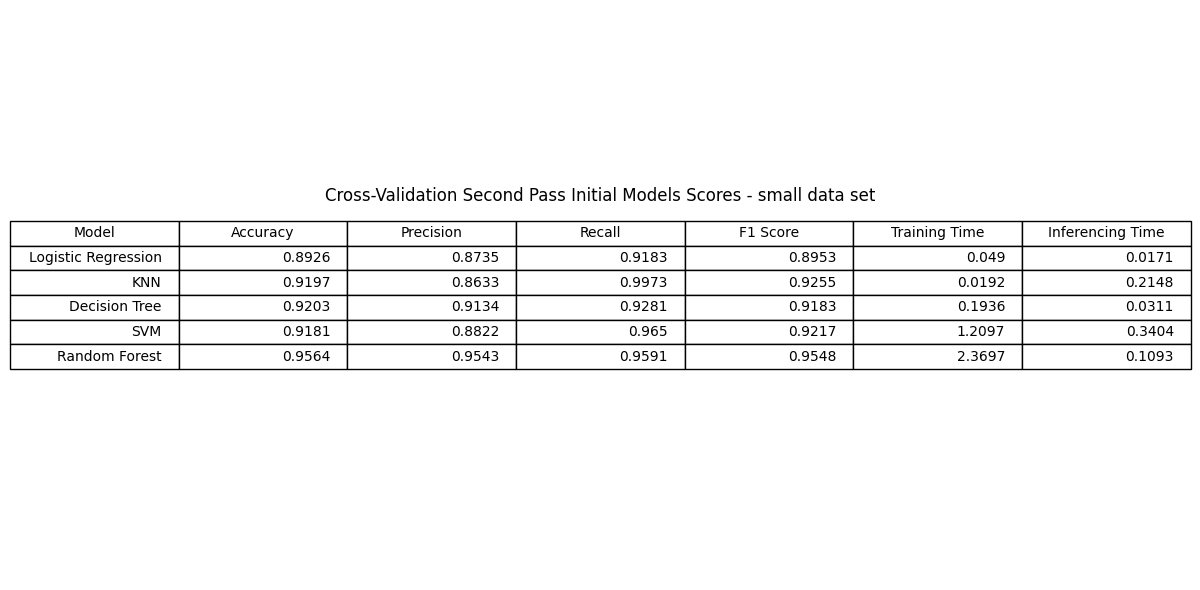

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
# Round up the scores to 2 decimal places
for column in ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Training Time', 'Inferencing Time']:
    results_df[column] = results_df[column].apply(lambda x: round(x, 4)) # Use apply() and round()

# Create image tio show results
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('off')

table = ax.table(cellText=results_df.values, colLabels=results_df.columns, loc='center')


table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.title("Cross-Validation Second Pass Initial Models Scores - small data set", y=.65)
plt.tight_layout()
plt.savefig('Cross-Validation Second Pass Initial Models Scores - small data set.png', bbox_inches='tight', dpi=300)
files.download('Cross-Validation Second Pass Initial Models Scores - small data set.png')

### Evaluation Against Test

In [181]:
# Create a dictionary to store metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
results ={}
accuracy =''
precision = ''
recall = ''
f1 = ''
confusion_mat =''

for model_name, model in models.items():
  # Predict on the test set
  y_pred = model.predict(X_test_processed_df)

  #Calculate metrics
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  recall = recall_score(y_test,y_pred)
  f1 = f1_score(y_test,y_pred)
  confusion_mat = confusion_matrix(y_test,y_pred)

  #Store the results in the dictionary
  results[model_name]={
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score':f1,
    'Confusion Matrix':confusion_mat
}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

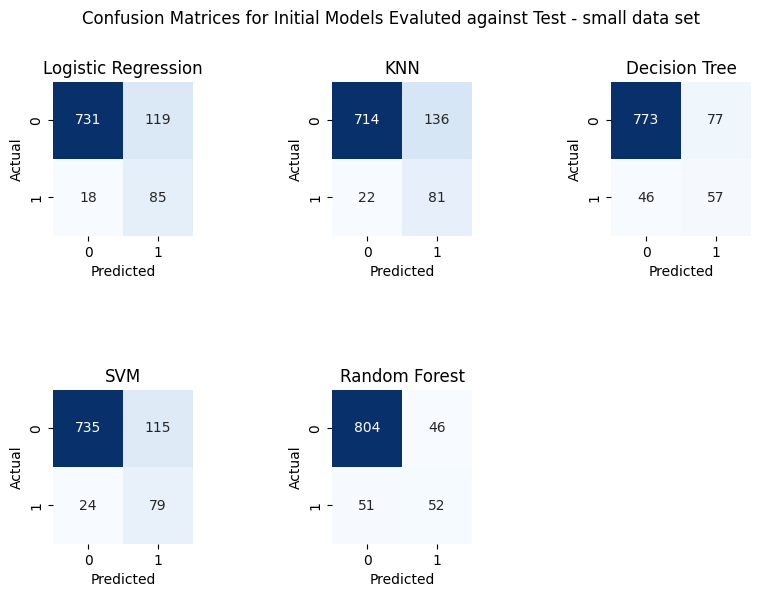

In [182]:
# Calculate rows and columns for the plot grid
import math
n_models = len(results)
n_cols = 3 # Maximum number of plots per row
n_rows = math.ceil(n_models/n_cols) #calculate teh required number of rows

# Create the subplot
fig,axes = plt.subplots(n_rows, n_cols, figsize=(n_cols *3, n_rows*3))#smaller figure size

# Flatten axes or easy iteration (works for multi-row layouts)
axes = axes.flatten()

# Plot each confusion matrix
for idx, (model_name, metrics) in enumerate(results.items()):
  confusion_mat = metrics['Confusion Matrix']
  sns.heatmap(confusion_mat, annot = True, fmt='d', cmap='Blues',cbar=False,ax=axes[idx])
  axes[idx].set_title(f'{model_name}')
  axes[idx].set_xlabel('Predicted')
  axes[idx].set_ylabel('Actual')

#Hide any unused subplots
for idx in range(len(results), len(axes)):
  axes[idx].axis('off')

#Add vertical space between rows
plt.subplots_adjust(hspace=1) # Incrate vertical spacing
plt.subplots_adjust(wspace=1) # Add optional horizotal space
fig.suptitle('Confusion Matrices for Initial Models Evaluted against Test - small data set', y=1.0)
plt.savefig('Confusion Matrices for Initial Models Evaluted against Test - small data set.png', bbox_inches='tight', dpi=300)
files.download('Confusion Matrices for Initial Models Evaluted against Test - small data set.png')
plt.show()

In [183]:
print(results)

{'Logistic Regression': {'Accuracy': 0.8562434417628542, 'Precision': 0.4166666666666667, 'Recall': 0.8252427184466019, 'F1-Score': 0.5537459283387622, 'Confusion Matrix': array([[731, 119],
       [ 18,  85]])}, 'KNN': {'Accuracy': 0.8342077649527807, 'Precision': 0.37327188940092165, 'Recall': 0.7864077669902912, 'F1-Score': 0.50625, 'Confusion Matrix': array([[714, 136],
       [ 22,  81]])}, 'Decision Tree': {'Accuracy': 0.8709338929695698, 'Precision': 0.4253731343283582, 'Recall': 0.5533980582524272, 'F1-Score': 0.4810126582278481, 'Confusion Matrix': array([[773,  77],
       [ 46,  57]])}, 'SVM': {'Accuracy': 0.8541448058761805, 'Precision': 0.4072164948453608, 'Recall': 0.7669902912621359, 'F1-Score': 0.531986531986532, 'Confusion Matrix': array([[735, 115],
       [ 24,  79]])}, 'Random Forest': {'Accuracy': 0.8982161594963274, 'Precision': 0.5306122448979592, 'Recall': 0.5048543689320388, 'F1-Score': 0.5174129353233831, 'Confusion Matrix': array([[804,  46],
       [ 51,  52

In [184]:
# Create a DataFrame for metrics and sort by F1-Score
metrics_df = pd.DataFrame(results).T.drop(columns='Confusion Matrix')

# Sort byF1-Score
metrics_df = metrics_df.sort_values(['F1-Score'],ascending=False)

metrics_df

Accuracy Precision    Recall  F1-Score
Logistic Regression  0.856243  0.416667  0.825243  0.553746
SVM                  0.854145  0.407216   0.76699  0.531987
Random Forest        0.898216  0.530612  0.504854  0.517413
KNN                  0.834208  0.373272  0.786408   0.50625
Decision Tree        0.870934  0.425373  0.553398  0.481013

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

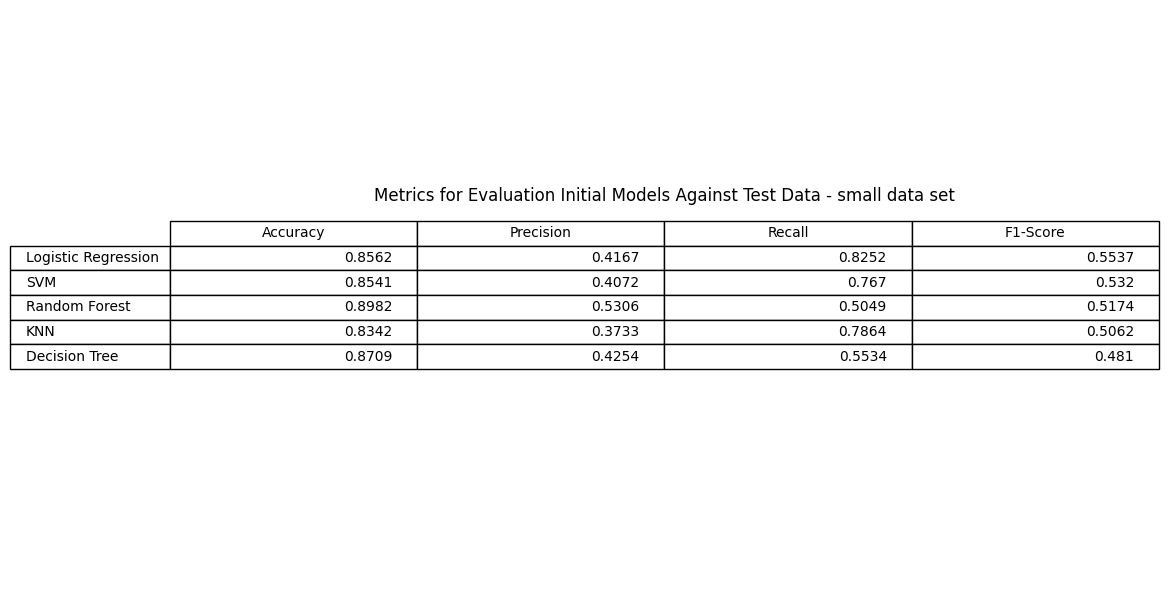

In [185]:
# Create image to show results
for column in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
    metrics_df[column] = metrics_df[column].apply(lambda x: round(x, 4)) # Use apply() and round()


fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('off')

table = ax.table(cellText=metrics_df.values, rowLabels=metrics_df.index, colLabels=metrics_df.columns, loc='center')


table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.title("Metrics for Evaluation Initial Models Against Test Data - small data set", y=.65)
plt.tight_layout()
plt.savefig('Metrics for Evaluation Initial Models Against Test Data - small data set.png', bbox_inches='tight', dpi=300)
files.download('Metrics for Evaluation Initial Models Against Test Data - small data set.png')
plt.show()

### Class Defitions
* **True Positive** - Model predicts someone indicated they will purchase (prediction = 1) and that person states they will purchase (actual value = 1)
* **True Negative** - Model predicts someone indicated they will not purchase (prediction = 0) and that person states they will not purchase (actual value = 0)
* **False Positive** - Model predicts someone indicated they will purchase (prediction = 1) and that person states they will not purchase (actual value = 0)
* **False Negative** - Model predicts someone indicated they will not purchase (prediction = 0) and that person states they will  prchase (actual value = 1)

### Random Forest, the Best Performing Model in this Case

In this context, Random Forest has the highest Accuracy and highest precision, and performs the best against the baseline dummy model.

Do identify how to increase sales, we want to maximize Precision, decreasing false positives so as to better Not predict that someone will purchase when they actually won't.

The baseline score for the full data set is:
0.87335.

The baseline score for the small data set is: 0.88667.

The Best Cross Validation Score by itself is for the Random Forest with an Accuracy of 0.956412.

The Best Cross Validation Score against Test is also for the Random Forest with an Accuracy of 0.898216.

However, the Random Forest is difficult to explain and takes the longest to process with a Training Time of 2.369707.  

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [186]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score


## 11.1 Grid Search

### Focus on Only One Feature to see how Long it takes correlated to target

### **NOTE:** Running all features with the full data set the GridSearch timed out - So we are using teh bank-additional.csv data set

### Create the paramater grids

In [212]:
# Parameter grids for models
param_grids = {
    'KNN': {
        'n_neighbors':[3,5,7,9],
        'weights': ['uniform','distance'],
        'metric':['euclidean','manhattan','minkowski']
    },
    'SVM':{
        'C':[0.1,1,10],
        'kernel':['linear','rbf'],
        'gamma':['scale','auto']

    },
    'Random Forest':{
        'n_estimators':[50,100,200],
        'max_depth':[None,10,20],
        'min_samples_split':[2,5]
    },
    'Logistic Regression': {
        'penalty': ['l2'],
        'C': [0.1, 1, 10],
        'max_iter': [100, 200, 500]
    },
    'Decision Tree': {
        'criterion': ['entropy'],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
}

### Apply GridSearch to One Feature

In [215]:
# Test code against only one feature
columns_to_keep=['age']#,'duration_of_contact','contacts_in_this_campaign']
X_train_balanced_skinny = X_train_balanced[columns_to_keep]
X_test_processed_skinny = X_test_processed_df[columns_to_keep]

# Initialize the best models dictionary
best_models={}
import time
# Perform grid search for each model
for model_name, params in param_grids.items():
  start_time = time.time()  # Record the start time

  print(f'Tuning{model_name}...')
  if model_name =='KNN':
    model =KNeighborsClassifier()
  elif model_name=='SVM':
    model =SVC(random_state=42)
  elif model_name=='Random Forest':
    model = RandomForestClassifier(random_state=42)
  elif model_name=='Logistic Regression':
    model = LogisticRegression(random_state=42)
  elif model_name=='Decision Tree':
    model = DecisionTreeClassifier()

# Set up GridSearchCV
  grid_search = GridSearchCV(
    estimator=model,
    param_grid=params,
    scoring='accuracy',
    cv=5,
    verbose=1
  )

  #Fit the grid search
  grid_search.fit(X_train_balanced_skinny,y_train_balanced)

  #Store the best model
  best_models[model_name] = grid_search.best_estimator_
  print(f'Best parameters for  {model_name} with {columns_to_keep} : {grid_search.best_params_}')
  print(f'Best accuracy score for {model_name} with {columns_to_keep}: {grid_search.best_score_}')
  end_time = time.time()  # Record the end time
  execution_time = end_time - start_time  # Calculate the execution time
  print(f"Execution time for {model_name} with {columns_to_keep}: {execution_time:.2f} seconds\n")  # Print the execution time



TuningKNN...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for  KNN with ['age'] : {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best accuracy score for KNN with ['age']: 0.894179932944005
Execution time for KNN with ['age']: 5.28 seconds

TuningSVM...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for  SVM with ['age'] : {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best accuracy score for SVM with ['age']: 0.564810641042202
Execution time for SVM with ['age']: 54.86 seconds

TuningRandom Forest...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for  Random Forest with ['age'] : {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy score for Random Forest with ['age']: 0.8986968617871444
Execution time for Random Forest with ['age']: 66.30 seconds

TuningLogistic Regression...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters fo

#### Apply Grid Search to 3 Features

In [216]:
# Test code against only three feature
columns_to_keep=['age','duration_of_contact','contacts_in_this_campaign']
X_train_balanced_skinny = X_train_balanced[columns_to_keep]
X_test_processed_skinny = X_test_processed_df[columns_to_keep]

# Initialize the best models dictionary
best_models={}
import time
# Perform grid search for each model
for model_name, params in param_grids.items():
  start_time = time.time()  # Record the start time

  print(f'Tuning{model_name}...')
  if model_name =='KNN':
    model =KNeighborsClassifier()
  elif model_name=='SVM':
    model =SVC(random_state=42)
  elif model_name=='Random Forest':
    model = RandomForestClassifier(random_state=42)
  elif model_name=='Logistic Regression':
    model = LogisticRegression(random_state=42)
  elif model_name=='Decision Tree':
    model = DecisionTreeClassifier()

# Set up GridSearchCV
  grid_search = GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=5,verbose=1
  )

  #Fit the grid search
  grid_search.fit(X_train_balanced_skinny,y_train_balanced)

  #Store the best model
  best_models[model_name] = grid_search.best_estimator_
  print(f'Best parameters for  {model_name} with {columns_to_keep} : {grid_search.best_params_}')
  print(f'Best accuracy score for {model_name} with {columns_to_keep}: {grid_search.best_score_}')
  end_time = time.time()  # Record the end time
  execution_time = end_time - start_time  # Calculate the execution time
  print(f"Execution time for {model_name} with {columns_to_keep}: {execution_time:.2f} seconds\n")  # Print the execution time



TuningKNN...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for  KNN with ['age', 'duration_of_contact', 'contacts_in_this_campaign'] : {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Best accuracy score for KNN with ['age', 'duration_of_contact', 'contacts_in_this_campaign']: 0.8297386975558687
Execution time for KNN with ['age', 'duration_of_contact', 'contacts_in_this_campaign']: 8.55 seconds

TuningSVM...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for  SVM with ['age', 'duration_of_contact', 'contacts_in_this_campaign'] : {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best accuracy score for SVM with ['age', 'duration_of_contact', 'contacts_in_this_campaign']: 0.771604350349258
Execution time for SVM with ['age', 'duration_of_contact', 'contacts_in_this_campaign']: 56.78 seconds

TuningRandom Forest...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for  Random Forest with ['

#### Apply GridSearch to Another Set of Three Features

In [217]:
# Test code against other three features
columns_to_keep=['duration_of_contact','contacts_in_this_campaign','#_prior_contacts']
X_train_balanced_skinny = X_train_balanced[columns_to_keep]
X_test_processed_skinny = X_test_processed_df[columns_to_keep]

# Initialize the best models dictionary
best_models={}
import time
# Perform grid search for each model
for model_name, params in param_grids.items():
  start_time = time.time()  # Record the start time

  print(f'Tuning{model_name}...')
  if model_name =='KNN':
    model =KNeighborsClassifier()
  elif model_name=='SVM':
    model =SVC(random_state=42)
  elif model_name=='Random Forest':
    model = RandomForestClassifier(random_state=42)
  elif model_name=='Logistic Regression':
    model = LogisticRegression(random_state=42)
  elif model_name=='Decision Tree':
    model = DecisionTreeClassifier()

# Set up GridSearchCV
  grid_search = GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=5,verbose=1
  )

  #Fit the grid search
  grid_search.fit(X_train_balanced_skinny,y_train_balanced)

  #Store the best model
  best_models[model_name] = grid_search.best_estimator_
  print(f'Best parameters for  {model_name} with {columns_to_keep} : {grid_search.best_params_}')
  print(f'Best accuracy score for {model_name} with {columns_to_keep}: {grid_search.best_score_}')
  end_time = time.time()  # Record the end time
  execution_time = end_time - start_time  # Calculate the execution time
  print(f"Execution time for {model_name} with {columns_to_keep}: {execution_time:.2f} seconds\n")  # Print the execution time


TuningKNN...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for  KNN with ['duration_of_contact', 'contacts_in_this_campaign', '#_prior_contacts'] : {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best accuracy score for KNN with ['duration_of_contact', 'contacts_in_this_campaign', '#_prior_contacts']: 0.8460415176479887
Execution time for KNN with ['duration_of_contact', 'contacts_in_this_campaign', '#_prior_contacts']: 6.89 seconds

TuningSVM...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for  SVM with ['duration_of_contact', 'contacts_in_this_campaign', '#_prior_contacts'] : {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best accuracy score for SVM with ['duration_of_contact', 'contacts_in_this_campaign', '#_prior_contacts']: 0.8045963626267904
Execution time for SVM with ['duration_of_contact', 'contacts_in_this_campaign', '#_prior_contacts']: 35.80 seconds

TuningRandom Forest...
Fitting 5 folds for each

## **NOTE:** Since running GridSearch against a limited number of features did not provide sufficient score against the Baseline, we will run GridSearch against all the Features

In [218]:
# Test with GridSearch Against All Features
columns_to_keep = 'All Features'

# Initialize the best models dictionary
best_models={}
import time
# Perform grid search for each model
for model_name, params in param_grids.items():
  start_time = time.time()  # Record the start time

  print(f'Tuning{model_name}...')
  if model_name =='KNN':
    model =KNeighborsClassifier()
  elif model_name=='SVM':
    model =SVC(random_state=42)
  elif model_name=='Random Forest':
    model = RandomForestClassifier(random_state=42)
  elif model_name=='Logistic Regression':
    model = LogisticRegression(random_state=42)
  elif model_name=='Decision Tree':
    model = DecisionTreeClassifier()

# Set up GridSearchCV
  grid_search = GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=5,verbose=1
  )

  #Fit the grid search
  grid_search.fit(X_train_balanced,y_train_balanced)

  #Store the best model
  best_models[model_name] = grid_search.best_estimator_
  print(f'Best parameters for  {model_name} with {columns_to_keep} : {grid_search.best_params_}')
  print(f'Best accuracy score for {model_name} with {columns_to_keep}: {grid_search.best_score_}')
  end_time = time.time()  # Record the end time
  execution_time = end_time - start_time  # Calculate the execution time
  print(f"Execution time for {model_name} with {columns_to_keep}: {execution_time:.2f} seconds\n")  # Print the execution time


TuningKNN...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for  KNN with All Features : {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best accuracy score for KNN with All Features: 0.9556175301877298
Execution time for KNN with All Features: 20.52 seconds

TuningSVM...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for  SVM with All Features : {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best accuracy score for SVM with All Features: 0.957386088676637
Execution time for SVM with All Features: 85.49 seconds

TuningRandom Forest...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for  Random Forest with All Features : {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best accuracy score for Random Forest with All Features: 0.9573941862953588
Execution time for Random Forest with All Features: 94.00 seconds

TuningLogistic Regression...
Fitting 5 folds for each of 9 ca

## 11.3 Identificationof the Evaluation Metrics

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

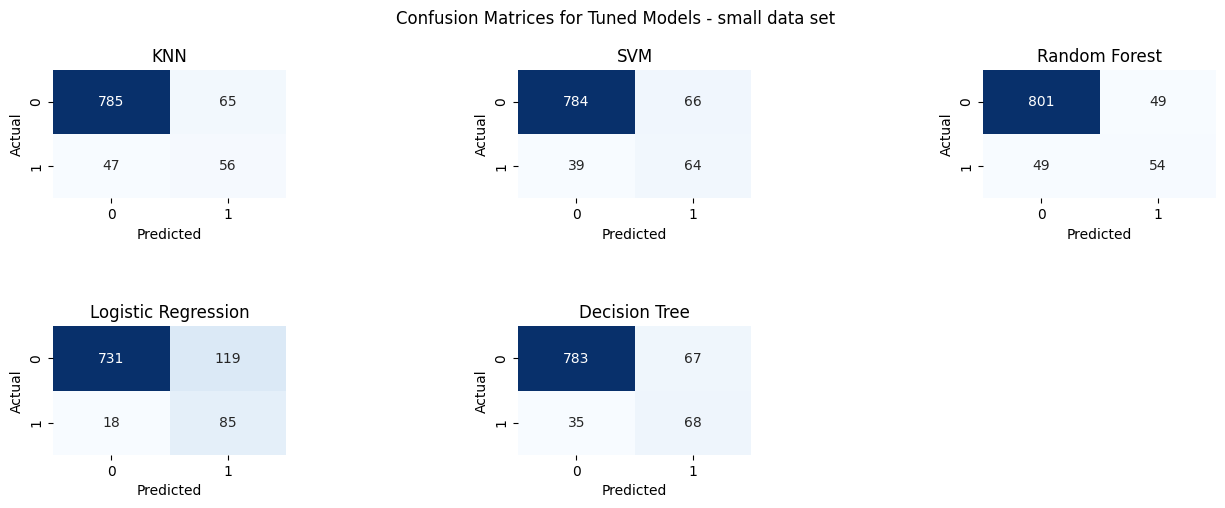

In [221]:
# Create a dictionary to store metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
results_tuned ={}
accuracy =''
precision = ''
recall = ''
f1 = ''
confusion_mat =''

for model_name, model in best_models.items():
  # Predict on the test set
  y_pred = model.predict(X_test_processed_df)

  #Calculate metrics
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  recall = recall_score(y_test,y_pred)
  f1 = f1_score(y_test,y_pred)
  confusion_mat = confusion_matrix(y_test,y_pred)

  #Store the results in the dictionary
  results_tuned[model_name]={
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score':f1,
    'Confusion Matrix':confusion_mat
}

# Create a DataFrame for metrics and sort by F1-Score
metrics_df_tuned = pd.DataFrame(results_tuned).T.drop(columns='Confusion Matrix')
metrics_df_tuned = metrics_df_tuned.sort_values(['Accuracy'],ascending=False)


#Plot confusion matrix for tuned models
fig,axes = plt.subplots(math.ceil(len(results_tuned)/3),3,figsize=(15,5))
axes = axes.flatten()


# Plot each confusion matrix
for idx, (model_name, metrics) in enumerate(results_tuned.items()):
  confusion_mat = metrics['Confusion Matrix']
  sns.heatmap(confusion_mat, annot = True, fmt='d', cmap='Blues',cbar=False,ax=axes[idx])
  axes[idx].set_title(f'{model_name}')
  axes[idx].set_xlabel('Predicted')
  axes[idx].set_ylabel('Actual')

#Hide any unused subplots
for idx in range(len(results_tuned), len(axes)):
  axes[idx].axis('off')

#Add vertical space between rows
plt.subplots_adjust(hspace=1) # Incrate vertical spacing
plt.subplots_adjust(wspace=1) # Add optional horizotal space
fig.suptitle('Confusion Matrices for Tuned Models - small data set', y=1.0)
plt.savefig('Confusion Matrices for Tuned Models - small data set.png', bbox_inches='tight', dpi=300)
files.download('Confusion Matrices for Tuned Models - small data set.png')
plt.show()

In [223]:
metrics_df_tuned

Accuracy Precision    Recall  F1-Score
Random Forest        0.897167  0.524272  0.524272  0.524272
Decision Tree         0.89297  0.503704  0.660194  0.571429
SVM                  0.889822  0.492308  0.621359  0.549356
KNN                  0.882476   0.46281  0.543689       0.5
Logistic Regression  0.856243  0.416667  0.825243  0.553746

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

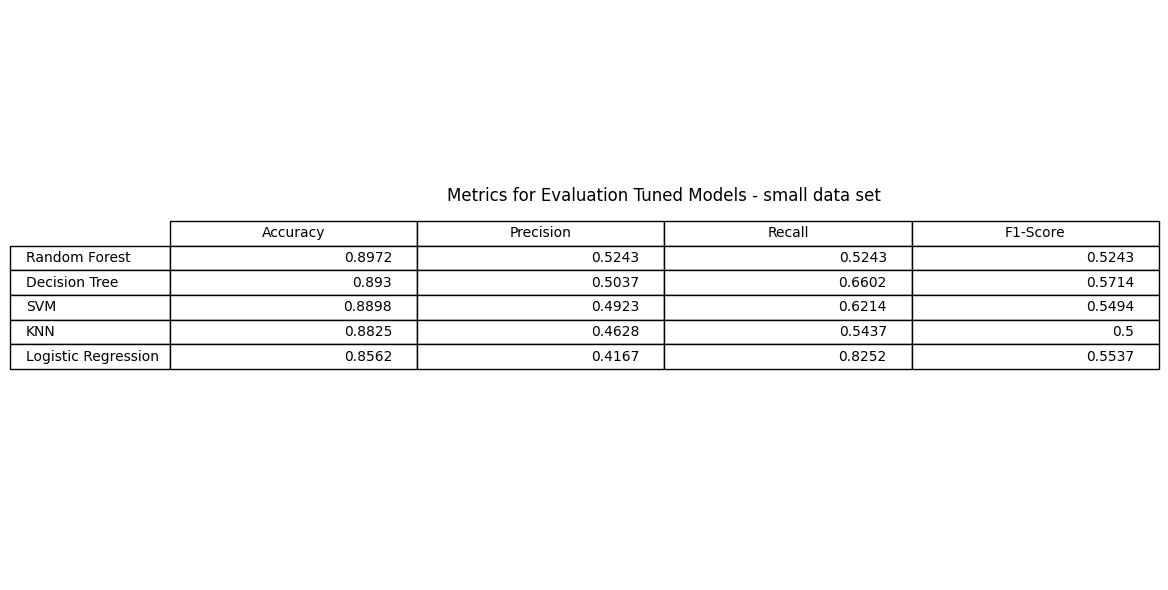

In [224]:
# Create image to show results
for column in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
    metrics_df_tuned[column] = metrics_df_tuned[column].apply(lambda x: round(x, 4))


fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('off')

table = ax.table(cellText=metrics_df_tuned.values, rowLabels=metrics_df_tuned.index, colLabels=metrics_df_tuned.columns, loc='center')


table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.title("Metrics for Evaluation Tuned Models - small data set", y=.65)
plt.tight_layout()
plt.savefig('Metrics for Evaluation Tuned Models - small data set.png', bbox_inches='tight', dpi=300)
files.download('Metrics for Evaluation Tuned Models - small data set.png')
plt.show()

## 11.4 Rationale for use of Evaluation Metric

For tuned models, Random Forest has the highest Accuracy and highest precision, and performs the best against the baseline dummy model, with an Accurracy of	0.897167	and a preicssion of 0.52427.

Precision measures the correctly predicted positive instances (true positives) out of all predicted as positive (true positives + false positives).

In marketing and sales, resources are often limited. Targeting individuals who are unlikely to buy the product leads to wasted marketing spend, sales efforts, and potentially customer frustration. By maximizing precision, you reduce the number of false positives, focusing your resources on individuals who are most likely to convert.

As stated before, to increase sales, we want to maximize Precision, decreasing false positives so as to better Not predict that someone will purchase when they actually won't.

The baseline score for the full data set is:
0.87335.

The baseline score for the small data set is: 0.88667.

However, the Random Forest is difficult to explain and takes the longest Training Time

# Intepreting the Model   

In [228]:
! pip install shap

In [229]:
import shap

In [230]:
# Take a random sample of 50 background samples
background = shap.sample(X_train_balanced,50)

In [233]:
# Create a SHAP explainer for the RF model
explainer = shap.KernelExplainer(models['Random Forest'].predict,background)

In [234]:
# Calcuate the SHAP values for the test samples
shap_values = explainer.shap_values(X_test_processed)

  0%|          | 0/953 [00:00<?, ?it/s]

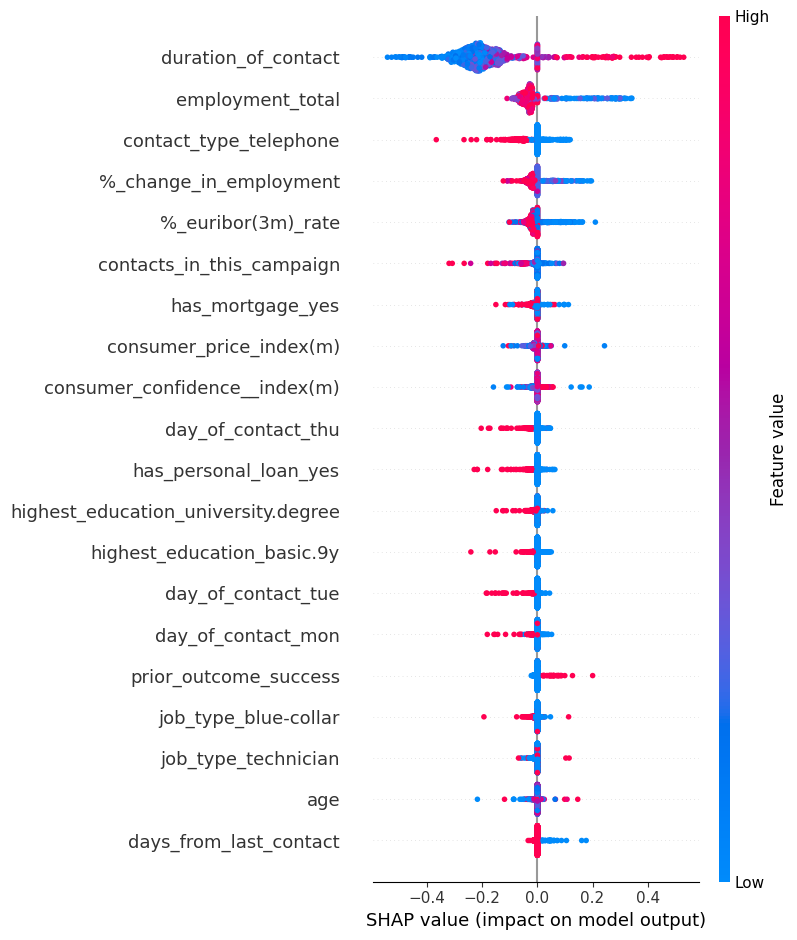

In [236]:
#Visualize SHAP values
shap.summary_plot(shap_values, X_test_processed, feature_names=all_column_names)

# 12 Recommendation

While the Best Model is a Random Forest, and the SHAP values show Duration of Contact and Days from Last Contact are the most relevant features for making predictions, the actual performance of the model is not significantly different from that of the baseline.  

The Best Model's accuracy was 0.897167 and a preicssion of 0.52427, compared to the the baseline score for the full data set of 0.87335. and baseline score for the small data set is: 0.88667.

First, the model should be run and fitted against the entire dataset.  Once this is done, the accurcay can be computed again.  

The full set baseline Random Forest model, without performing hyper tuning (due to the compute resources being insufficient to run GridSearch) an Accuracy of 0.8974.  The difference from best performing model could be compared to the 0.87335 baseline, and this could be used to determine the new improvement.  However, given the low Precision scores, the ability to use the model to correctly identify whom to target is not possible

Rather, since the most highly correlated and best indicator of whether a prospect will purhcase is the duration of the contact (where a contact of 0 means there is no purchase, which in itself needs to be explored), the bank could calculate the cost per minute of the campaign per contact and then compare this cost against the additional % increase in product sales.  However, we will not that this possible ~1% increase in sales, is only the assertion of a sale by the respondent, not the actual sale itself, which is probably lower than 1%.

If the dollar value of increased sales is greater than the cost of the campaigns AND the opportunity cost of the campaign is less than other alternative opportunities to increase sales and profitability, then continuing the marketig campaigns may make sense.  However, an initial look would recomend NOT continuing the marketing campaigns.